# Data Preprocessing - Train Dataset

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [2]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.set_option('display.max_info_columns', 1000000000000)
pd.set_option('display.max_info_rows', 1000000000000000)
pd.set_option('display.float_format', lambda x: '%.5f' % x)

In [3]:
loan_data = pd.read_csv('C:/Users/marcu/Desktop/Personal/365 Data Science/Credit risk modeling/Datasets/loan_data.csv', index_col = 0)

C:\Users\marcu\anaconda3\lib\site-packages\numpy\lib\arraysetops.py:583: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


### Dependent Variable

In [4]:
loan_data['loan_status'].unique()

array(['Fully Paid', 'Charged Off',
       'Does not meet the credit policy. Status:Fully Paid',
       'Does not meet the credit policy. Status:Charged Off', 'Current',
       'Late (31-120 days)', 'In Grace Period', 'Late (16-30 days)',
       'Default', 'Issued'], dtype=object)

In [5]:
loan_data['loan_status'].value_counts()

Fully Paid                                             1497783
Current                                                1031016
Charged Off                                             362548
Late (31-120 days)                                       16154
In Grace Period                                          10028
Late (16-30 days)                                         2719
Issued                                                    2062
Does not meet the credit policy. Status:Fully Paid        1988
Does not meet the credit policy. Status:Charged Off        761
Default                                                    433
Name: loan_status, dtype: int64

In [6]:
loan_data['loan_status'].count()

2925492

In [7]:
loan_data['loan_status'].value_counts() / 2925492

Fully Paid                                            0.51198
Current                                               0.35242
Charged Off                                           0.12393
Late (31-120 days)                                    0.00552
In Grace Period                                       0.00343
Late (16-30 days)                                     0.00093
Issued                                                0.00070
Does not meet the credit policy. Status:Fully Paid    0.00068
Does not meet the credit policy. Status:Charged Off   0.00026
Default                                               0.00015
Name: loan_status, dtype: float64

In [8]:
loan_data['good_bad'] = np.where(loan_data['loan_status'].isin(['Charged Off', 'Late (31-120 days)', 'Does not meet the credit policy. Status:Charged Off', 'Default']), 0, 1)
loan_data['good_bad'].head(50)

0     1
1     0
2     1
3     1
4     1
5     1
6     1
7     1
8     0
9     0
10    1
11    1
12    0
13    1
14    0
15    1
16    1
17    1
18    1
19    1
20    1
21    0
22    1
23    1
24    0
25    1
26    0
27    0
28    1
29    1
30    1
31    1
32    1
33    1
34    1
35    1
36    1
37    1
38    1
39    1
40    1
41    1
42    1
43    1
44    1
45    1
46    0
47    1
48    1
49    1
Name: good_bad, dtype: int32

In [9]:
loan_data.head()

,emp_length,earliest_cr_line,term,issue_d,grade,sub_grade,home_ownership,verification_status,loan_status,purpose,addr_state,initial_list_status,total_rev_hi_lim,funded_amnt,annual_inc,acc_now_delinq,total_acc,pub_rec,open_acc,inq_last_6mths,delinq_2yrs,int_rate,installment,mths_since_last_delinq,dti,mths_since_last_record,emp_length_int,earliest_cr_line_date,mths_since_earliest_cr_line,term_int,issue_d_date,mths_since_issue_d,grade:A,grade:B,grade:C,grade:D,grade:E,grade:F,grade:G,sub_grade:A1,sub_grade:A2,sub_grade:A3,sub_grade:A4,sub_grade:A5,sub_grade:B1,sub_grade:B2,sub_grade:B3,sub_grade:B4,sub_grade:B5,sub_grade:C1,sub_grade:C2,sub_grade:C3,sub_grade:C4,sub_grade:C5,sub_grade:D1,sub_grade:D2,sub_grade:D3,sub_grade:D4,sub_grade:D5,sub_grade:E1,sub_grade:E2,sub_grade:E3,sub_grade:E4,sub_grade:E5,sub_grade:F1,sub_grade:F2,sub_grade:F3,sub_grade:F4,sub_grade:F5,sub_grade:G1,sub_grade:G2,sub_grade:G3,sub_grade:G4,sub_grade:G5,home_ownership:ANY,home_ownership:MORTGAGE,home_ownership:NONE,home_ownership:OTHER,home_ownership:OWN,home_ownership:RENT,verification_status:Not Verified,verification_status:Source Verified,verification_status:Verified,loan_status:Charged Off,loan_status:Current,loan_status:Default,loan_status:Does not meet the credit policy. Status:Charged Off,loan_status:Does not meet the credit policy. Status:Fully Paid,loan_status:Fully Paid,loan_status:In Grace Period,loan_status:Issued,loan_status:Late (16-30 days),loan_status:Late (31-120 days),purpose:car,purpose:credit_card,purpose:debt_consolidation,purpose:educational,purpose:home_improvement,purpose:house,purpose:major_purchase,purpose:medical,purpose:moving,purpose:other,purpose:renewable_energy,purpose:small_business,purpose:vacation,purpose:wedding,addr_state:AK,addr_state:AL,addr_state:AR,addr_state:AZ,addr_state:CA,addr_state:CO,addr_state:CT,addr_state:DC,addr_state:DE,addr_state:FL,addr_state:GA,addr_state:HI,addr_state:IA,addr_state:ID,addr_state:IL,addr_state:IN,addr_state:KS,addr_state:KY,addr_state:LA,addr_state:MA,addr_state:MD,addr_state:ME,addr_state:MI,addr_state:MN,addr_state:MO,addr_state:MS,addr_state:MT,addr_state:NC,addr_state:ND,addr_state:NE,addr_state:NH,addr_state:NJ,addr_state:NM,addr_state:NV,addr_state:NY,addr_state:OH,addr_state:OK,addr_state:OR,addr_state:PA,addr_state:RI,addr_state:SC,addr_state:SD,addr_state:TN,addr_state:TX,addr_state:UT,addr_state:VA,addr_state:VT,addr_state:WA,addr_state:WI,addr_state:WV,addr_state:WY,initial_list_status:f,initial_list_status:w,good_bad
0,10+ years,Jan-1985,36 months,Dec-2011,B,B2,RENT,Verified,Fully Paid,credit_card,AZ,f,5000.00000,5000.00000,24000.00000,0.00000,9.00000,0.00000,3.00000,1.00000,0.00000,10.65%,162.87000,NaN,27.65000,NaN,10.00000,1985-01-01,441.00000,36.00000,2011-12-01,118.00000,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1
1,< 1 year,Apr-1999,60 months,Dec-2011,C,C4,RENT,Source Verified,Charged Off,car,GA,f,2500.00000,2500.00000,30000.00000,0.00000,4.00000,0.00000,3.00000,5.00000,0.00000,15.27%,59.83000,NaN,1.00000,NaN,0.00000,1999-04-01,270.00000,60.00000,2011-12-01,118.00000,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
2,10+ years,Nov-2001,36 months,Dec-2011,C,C5,RENT,Not Verified,Fully Paid,small_business,IL,f,2400.00000,2400.00000,12252.00000,0.00000,10.00000,0.00000,2.00000,2.00000,0.00000,15.96%,84.33000,NaN,8.72000,NaN,10.00000,2001-11-01,239.00000,36.00000,2011-12-01,118.00000,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0

### Splitting Data

In [10]:
from sklearn.model_selection import train_test_split

In [11]:
a = loan_data.drop('good_bad', axis=1)

In [12]:
loan_data_inputs_train, loan_data_inputs_test, loan_data_targets_train, loan_data_targets_test = train_test_split(a, loan_data['good_bad'], test_size=0.2, random_state=42)

In [13]:
loan_data_inputs_train.shape

(2340393, 160)

In [14]:
loan_data_inputs_train.head()

,emp_length,earliest_cr_line,term,issue_d,grade,sub_grade,home_ownership,verification_status,loan_status,purpose,addr_state,initial_list_status,total_rev_hi_lim,funded_amnt,annual_inc,acc_now_delinq,total_acc,pub_rec,open_acc,inq_last_6mths,delinq_2yrs,int_rate,installment,mths_since_last_delinq,dti,mths_since_last_record,emp_length_int,earliest_cr_line_date,mths_since_earliest_cr_line,term_int,issue_d_date,mths_since_issue_d,grade:A,grade:B,grade:C,grade:D,grade:E,grade:F,grade:G,sub_grade:A1,sub_grade:A2,sub_grade:A3,sub_grade:A4,sub_grade:A5,sub_grade:B1,sub_grade:B2,sub_grade:B3,sub_grade:B4,sub_grade:B5,sub_grade:C1,sub_grade:C2,sub_grade:C3,sub_grade:C4,sub_grade:C5,sub_grade:D1,sub_grade:D2,sub_grade:D3,sub_grade:D4,sub_grade:D5,sub_grade:E1,sub_grade:E2,sub_grade:E3,sub_grade:E4,sub_grade:E5,sub_grade:F1,sub_grade:F2,sub_grade:F3,sub_grade:F4,sub_grade:F5,sub_grade:G1,sub_grade:G2,sub_grade:G3,sub_grade:G4,sub_grade:G5,home_ownership:ANY,home_ownership:MORTGAGE,home_ownership:NONE,home_ownership:OTHER,home_ownership:OWN,home_ownership:RENT,verification_status:Not Verified,verification_status:Source Verified,verification_status:Verified,loan_status:Charged Off,loan_status:Current,loan_status:Default,loan_status:Does not meet the credit policy. Status:Charged Off,loan_status:Does not meet the credit policy. Status:Fully Paid,loan_status:Fully Paid,loan_status:In Grace Period,loan_status:Issued,loan_status:Late (16-30 days),loan_status:Late (31-120 days),purpose:car,purpose:credit_card,purpose:debt_consolidation,purpose:educational,purpose:home_improvement,purpose:house,purpose:major_purchase,purpose:medical,purpose:moving,purpose:other,purpose:renewable_energy,purpose:small_business,purpose:vacation,purpose:wedding,addr_state:AK,addr_state:AL,addr_state:AR,addr_state:AZ,addr_state:CA,addr_state:CO,addr_state:CT,addr_state:DC,addr_state:DE,addr_state:FL,addr_state:GA,addr_state:HI,addr_state:IA,addr_state:ID,addr_state:IL,addr_state:IN,addr_state:KS,addr_state:KY,addr_state:LA,addr_state:MA,addr_state:MD,addr_state:ME,addr_state:MI,addr_state:MN,addr_state:MO,addr_state:MS,addr_state:MT,addr_state:NC,addr_state:ND,addr_state:NE,addr_state:NH,addr_state:NJ,addr_state:NM,addr_state:NV,addr_state:NY,addr_state:OH,addr_state:OK,addr_state:OR,addr_state:PA,addr_state:RI,addr_state:SC,addr_state:SD,addr_state:TN,addr_state:TX,addr_state:UT,addr_state:VA,addr_state:VT,addr_state:WA,addr_state:WI,addr_state:WV,addr_state:WY,initial_list_status:f,initial_list_status:w
1986640,< 1 year,Apr-2012,36 months,Oct-2015,F,F2,RENT,Source Verified,Fully Paid,debt_consolidation,LA,w,5000.00000,4975.00000,30000.00000,0.00000,8.00000,0.00000,7.00000,3.00000,1.00000,22.99%,192.56000,NaN,6.20000,NaN,0.00000,2012-04-01,114.00000,36.00000,2015-10-01,72.00000,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
2097124,< 1 year,Jan-2001,36 months,Jul-2015,B,B2,MORTGAGE,Source Verified,Fully Paid,credit_card,WI,w,33300.00000,9600.00000,40000.00000,0.00000,18.00000,0.00000,6.00000,0.00000,2.00000,9.17%,306.04000,5.00000,12.39000,NaN,0.00000,2001-01-01,249.00000,36.00000,2015-07-01,75.00000,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1
728646,3 years,May-2001,60 months,Sep-2018,B,B2,MORTGAGE,Not Verified,Current,credit_card,GA,w,75000.00000,30000.00000,160000.00000,0.00000,30.00000,0.00000,12.00000,0.00000,0.00000,10.47%,644.38000,NaN,14.85000,NaN,3.00000,2001-05-01,245.00000,60.00000,2018-09-01,37.00000,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,

In [15]:
loan_data_inputs_test.shape

(585099, 160)

In [16]:
loan_data_targets_train.shape

(2340393,)

In [17]:
loan_data_targets_test.shape

(585099,)

In [18]:
df_inputs_prepr = loan_data_inputs_train
df_targets_prepr = loan_data_targets_train

### Data Preprocessing Example

In [19]:
df_inputs_prepr['grade'].unique()

array(['F', 'B', 'A', 'D', 'C', 'E', 'G'], dtype=object)

In [20]:
df1 = pd.concat([df_inputs_prepr['grade'], df_targets_prepr], axis=1)
df1.head(100)

,grade,good_bad
1986640,F,1
2097124,B,1
728646,B,1
718214,A,1
700110,A,1
2572469,D,1
1932559,A,1
1768836,B,1
1351671,C,1
2612467,E,1


In [21]:
df1.groupby(df1.columns.values[0], as_index=False)[df1.columns.values[1]].count()

,grade,good_bad
0,A,524870
1,B,686029
2,C,641802
3,D,333273
4,E,111276
5,F,33391
6,G,9752


In [22]:
df1.groupby(df1.columns.values[0], as_index=False)[df1.columns.values[1]].mean()

,grade,good_bad
0,A,0.96313
1,B,0.90899
2,C,0.84567
3,D,0.79051
4,E,0.67745
5,F,0.59744
6,G,0.55835


In [23]:
df1 = pd.concat([df1.groupby(df1.columns.values[0], as_index=False)[df1.columns.values[1]].count(), df1.groupby(df1.columns.values[0], as_index=False)[df1.columns.values[1]].mean()], axis=1)
df1

,grade,good_bad,grade,good_bad
0,A,524870,A,0.96313
1,B,686029,B,0.90899
2,C,641802,C,0.84567
3,D,333273,D,0.79051
4,E,111276,E,0.67745
5,F,33391,F,0.59744
6,G,9752,G,0.55835


In [24]:
df1 = df1.iloc[:, [0,1,3]]
df1

,grade,good_bad,good_bad
0,A,524870,0.96313
1,B,686029,0.90899
2,C,641802,0.84567
3,D,333273,0.79051
4,E,111276,0.67745
5,F,33391,0.59744
6,G,9752,0.55835


In [25]:
df1.columns = [df1.columns.values[0], 'n_obs', 'prop_good']
df1

,grade,n_obs,prop_good
0,A,524870,0.96313
1,B,686029,0.90899
2,C,641802,0.84567
3,D,333273,0.79051
4,E,111276,0.67745
5,F,33391,0.59744
6,G,9752,0.55835


In [26]:
df1['prop_n_obs'] = df1['n_obs'] / df1['n_obs'].sum()
df1

,grade,n_obs,prop_good,prop_n_obs
0,A,524870,0.96313,0.22427
1,B,686029,0.90899,0.29313
2,C,641802,0.84567,0.27423
3,D,333273,0.79051,0.14240
4,E,111276,0.67745,0.04755
5,F,33391,0.59744,0.01427
6,G,9752,0.55835,0.00417


In [27]:
df1['n_good'] = df1['prop_good'] * df1['n_obs']
df1['n_bad'] = (1 - df1['prop_good']) * df1['n_obs']
df1

,grade,n_obs,prop_good,prop_n_obs,n_good,n_bad
0,A,524870,0.96313,0.22427,505520.00000,19350.00000
1,B,686029,0.90899,0.29313,623596.00000,62433.00000
2,C,641802,0.84567,0.27423,542754.00000,99048.00000
3,D,333273,0.79051,0.14240,263457.00000,69816.00000
4,E,111276,0.67745,0.04755,75384.00000,35892.00000
5,F,33391,0.59744,0.01427,19949.00000,13442.00000
6,G,9752,0.55835,0.00417,5445.00000,4307.00000


In [28]:
df1['prop_n_good'] = df1['n_good'] / df1['n_good'].sum()
df1['prop_n_bad'] = df1['n_bad'] / df1['n_bad'].sum()
df1

,grade,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad
0,A,524870,0.96313,0.22427,505520.00000,19350.00000,0.24828,0.06359
1,B,686029,0.90899,0.29313,623596.00000,62433.00000,0.30627,0.20518
2,C,641802,0.84567,0.27423,542754.00000,99048.00000,0.26656,0.32551
3,D,333273,0.79051,0.14240,263457.00000,69816.00000,0.12939,0.22944
4,E,111276,0.67745,0.04755,75384.00000,35892.00000,0.03702,0.11795
5,F,33391,0.59744,0.01427,19949.00000,13442.00000,0.00980,0.04418
6,G,9752,0.55835,0.00417,5445.00000,4307.00000,0.00267,0.01415


In [29]:
df1['WoE'] = np.log(df1['prop_n_good'] / df1['prop_n_bad'])
df1

,grade,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE
0,A,524870,0.96313,0.22427,505520.00000,19350.00000,0.24828,0.06359,1.36208
1,B,686029,0.90899,0.29313,623596.00000,62433.00000,0.30627,0.20518,0.40059
2,C,641802,0.84567,0.27423,542754.00000,99048.00000,0.26656,0.32551,-0.19977
3,D,333273,0.79051,0.14240,263457.00000,69816.00000,0.12939,0.22944,-0.57279
4,E,111276,0.67745,0.04755,75384.00000,35892.00000,0.03702,0.11795,-1.15874
5,F,33391,0.59744,0.01427,19949.00000,13442.00000,0.00980,0.04418,-1.50602
6,G,9752,0.55835,0.00417,5445.00000,4307.00000,0.00267,0.01415,-1.66636


In [30]:
df1 = df1.sort_values(['WoE'])
df1 = df1.reset_index(drop = True)
df1

,grade,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE
0,G,9752,0.55835,0.00417,5445.00000,4307.00000,0.00267,0.01415,-1.66636
1,F,33391,0.59744,0.01427,19949.00000,13442.00000,0.00980,0.04418,-1.50602
2,E,111276,0.67745,0.04755,75384.00000,35892.00000,0.03702,0.11795,-1.15874
3,D,333273,0.79051,0.14240,263457.00000,69816.00000,0.12939,0.22944,-0.57279
4,C,641802,0.84567,0.27423,542754.00000,99048.00000,0.26656,0.32551,-0.19977
5,B,686029,0.90899,0.29313,623596.00000,62433.00000,0.30627,0.20518,0.40059
6,A,524870,0.96313,0.22427,505520.00000,19350.00000,0.24828,0.06359,1.36208


In [31]:
df1['diff_prop_good'] = df1['prop_good'].diff().abs()

In [32]:
df1['diff_WoE'] = df1['WoE'].diff().abs()

In [33]:
df1

,grade,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE
0,G,9752,0.55835,0.00417,5445.00000,4307.00000,0.00267,0.01415,-1.66636,NaN,NaN
1,F,33391,0.59744,0.01427,19949.00000,13442.00000,0.00980,0.04418,-1.50602,0.03909,0.16034
2,E,111276,0.67745,0.04755,75384.00000,35892.00000,0.03702,0.11795,-1.15874,0.08001,0.34729
3,D,333273,0.79051,0.14240,263457.00000,69816.00000,0.12939,0.22944,-0.57279,0.11306,0.58595
4,C,641802,0.84567,0.27423,542754.00000,99048.00000,0.26656,0.32551,-0.19977,0.05516,0.37302
5,B,686029,0.90899,0.29313,623596.00000,62433.00000,0.30627,0.20518,0.40059,0.06332,0.60036
6,A,524870,0.96313,0.22427,505520.00000,19350.00000,0.24828,0.06359,1.36208,0.05414,0.96149


In [34]:
df1['IV'] = (df1['prop_n_good'] - df1['prop_n_bad']) * df1['WoE']
df1['IV'] = df1['IV'].sum()
df1

,grade,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,G,9752,0.55835,0.00417,5445.00000,4307.00000,0.00267,0.01415,-1.66636,NaN,NaN,0.52582
1,F,33391,0.59744,0.01427,19949.00000,13442.00000,0.00980,0.04418,-1.50602,0.03909,0.16034,0.52582
2,E,111276,0.67745,0.04755,75384.00000,35892.00000,0.03702,0.11795,-1.15874,0.08001,0.34729,0.52582
3,D,333273,0.79051,0.14240,263457.00000,69816.00000,0.12939,0.22944,-0.57279,0.11306,0.58595,0.52582
4,C,641802,0.84567,0.27423,542754.00000,99048.00000,0.26656,0.32551,-0.19977,0.05516,0.37302,0.52582
5,B,686029,0.90899,0.29313,623596.00000,62433.00000,0.30627,0.20518,0.40059,0.06332,0.60036,0.52582
6,A,524870,0.96313,0.22427,505520.00000,19350.00000,0.24828,0.06359,1.36208,0.05414,0.96149,0.52582


### Data Preprocessing Automated

In [35]:
def woe_discrete(df, discrete_variable_name, good_bad_variable_df):
    df = pd.concat([df[discrete_variable_name], good_bad_variable_df], axis = 1)
    df = pd.concat([df.groupby(df.columns.values[0], as_index=False)[df.columns.values[1]].count(),
                    df.groupby(df.columns.values[0], as_index=False)[df.columns.values[1]].mean()], axis=1)
    df = df.iloc[:, [0,1,3]]
    df.columns = [df.columns.values[0], 'n_obs', 'prop_good']
    df['prop_n_obs'] = df['n_obs'] / df['n_obs'].sum()
    df['n_good'] = df['prop_good'] * df['n_obs']
    df['n_bad'] = (1 - df['prop_good']) * df['n_obs']
    df['prop_n_good'] = df['n_good'] / df['n_good'].sum()
    df['prop_n_bad'] = df['n_bad'] / df['n_bad'].sum()
    df['WoE'] = np.log(df['prop_n_good'] / df['prop_n_bad'])
    df = df.sort_values(['WoE'])
    df = df.reset_index(drop = True)
    df['diff_prop_good'] = df['prop_good'].diff().abs()
    df['diff_WoE'] = df['WoE'].diff().abs()
    df['IV'] = (df['prop_n_good'] - df['prop_n_bad']) * df['WoE']
    df['IV'] = df['IV'].sum()
    return df

In [36]:
df_temp = woe_discrete(df_inputs_prepr, 'grade', df_targets_prepr)
df_temp

,grade,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,G,9752,0.55835,0.00417,5445.00000,4307.00000,0.00267,0.01415,-1.66636,NaN,NaN,0.52582
1,F,33391,0.59744,0.01427,19949.00000,13442.00000,0.00980,0.04418,-1.50602,0.03909,0.16034,0.52582
2,E,111276,0.67745,0.04755,75384.00000,35892.00000,0.03702,0.11795,-1.15874,0.08001,0.34729,0.52582
3,D,333273,0.79051,0.14240,263457.00000,69816.00000,0.12939,0.22944,-0.57279,0.11306,0.58595,0.52582
4,C,641802,0.84567,0.27423,542754.00000,99048.00000,0.26656,0.32551,-0.19977,0.05516,0.37302,0.52582
5,B,686029,0.90899,0.29313,623596.00000,62433.00000,0.30627,0.20518,0.40059,0.06332,0.60036,0.52582
6,A,524870,0.96313,0.22427,505520.00000,19350.00000,0.24828,0.06359,1.36208,0.05414,0.96149,0.52582


In [37]:
def plot_by_woe(df_WoE, rotation_of_x_axis_labels = 0):
    x = np.array(df_WoE.iloc[:, 0].apply(str))
    y = df_WoE['WoE']
    plt.figure(figsize=(18, 6))
    plt.plot(x, y, marker = 'o', linestyle = '--', color = 'k')
    plt.xlabel(df_WoE.columns[0])
    plt.ylabel('Weight of Evidence')
    plt.title(str('Weight of Evidence by' + df_WoE.columns[0]))
    plt.xticks(rotation = rotation_of_x_axis_labels)

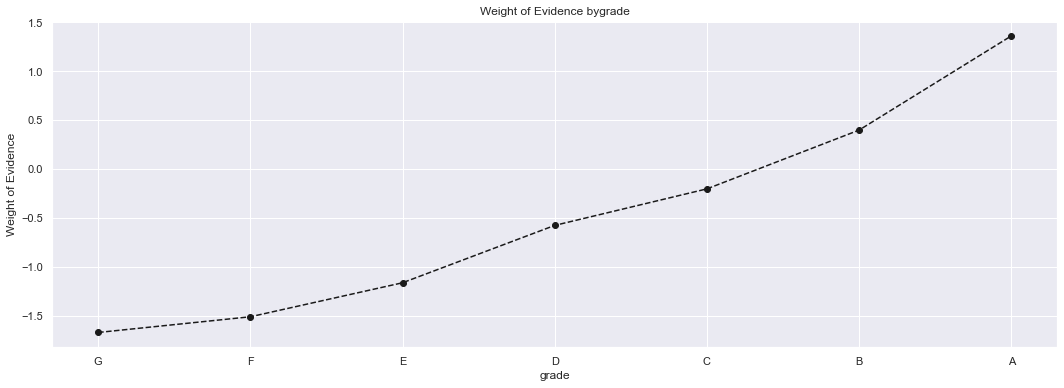

In [38]:
plot_by_woe(df_temp)

### Preprocessing Discrete Variables

In [39]:
df_temp = woe_discrete(df_inputs_prepr, 'home_ownership', df_targets_prepr)
df_temp

,home_ownership,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,OTHER,135,0.78519,0.00006,106.00000,29.00000,0.00005,0.00010,-0.60468,NaN,NaN,0.02563
1,NONE,45,0.82222,0.00002,37.00000,8.00000,0.00002,0.00003,-0.36934,0.03704,0.23533,0.02563
2,RENT,921999,0.84868,0.39395,782481.00000,139518.00000,0.38430,0.45851,-0.17654,0.02646,0.19280,0.02563
3,OWN,265642,0.86859,0.11350,230735.00000,34907.00000,0.11332,0.11472,-0.01224,0.01992,0.16431,0.02563
4,MORTGAGE,1149778,0.88728,0.49128,1020176.00000,129602.00000,0.50104,0.42592,0.16244,0.01869,0.17468,0.02563
5,ANY,2794,0.91983,0.00119,2570.00000,224.00000,0.00126,0.00074,0.53920,0.03255,0.37675,0.02563


In [40]:
df_temp.sort_values('prop_n_obs')

,home_ownership,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
1,NONE,45,0.82222,0.00002,37.00000,8.00000,0.00002,0.00003,-0.36934,0.03704,0.23533,0.02563
0,OTHER,135,0.78519,0.00006,106.00000,29.00000,0.00005,0.00010,-0.60468,NaN,NaN,0.02563
5,ANY,2794,0.91983,0.00119,2570.00000,224.00000,0.00126,0.00074,0.53920,0.03255,0.37675,0.02563
3,OWN,265642,0.86859,0.11350,230735.00000,34907.00000,0.11332,0.11472,-0.01224,0.01992,0.16431,0.02563
2,RENT,921999,0.84868,0.39395,782481.00000,139518.00000,0.38430,0.45851,-0.17654,0.02646,0.19280,0.02563
4,MORTGAGE,1149778,0.88728,0.49128,1020176.00000,129602.00000,0.50104,0.42592,0.16244,0.01869,0.17468,0.02563


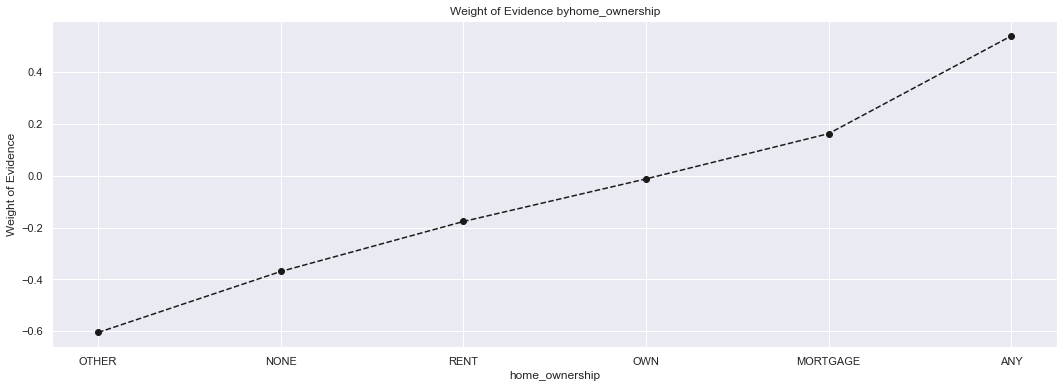

In [41]:
plot_by_woe(df_temp)

In [42]:
df_inputs_prepr['home_ownership:RENT_OTHER_NONE_ANY'] = sum([df_inputs_prepr['home_ownership:RENT'], df_inputs_prepr['home_ownership:OTHER'],
                                                            df_inputs_prepr['home_ownership:NONE'], df_inputs_prepr['home_ownership:ANY']])

<ipython-input-42-2d91c7b9543c>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_inputs_prepr['home_ownership:RENT_OTHER_NONE_ANY'] = sum([df_inputs_prepr['home_ownership:RENT'], df_inputs_prepr['home_ownership:OTHER'],


In [43]:
df_inputs_prepr['home_ownership:RENT_OTHER_NONE_ANY'].head(100)

1986640    1
2097124    0
728646     0
718214     1
700110     1
2572469    1
1932559    1
1768836    0
1351671    1
2612467    0
1579136    0
2420466    0
2441348    0
2804050    0
336253     1
866302     0
125933     0
1030472    0
1844289    0
676710     0
1822362    1
231967     1
969683     0
1409067    1
2903601    0
1254718    0
2218808    1
2923366    1
1715844    1
772724     1
2863341    1
1118321    0
204845     0
776249     0
708686     0
1931953    0
1408464    1
2093864    1
1828551    0
2766457    0
496207     0
98977      0
894338     0
1635630    0
1213921    1
1309425    0
104289     1
590867     0
155122     0
1260585    1
2162552    1
2639526    0
2178887    0
1202385    0
2203700    0
969511     1
248194     1
353711     0
2477802    0
661079     0
2631577    0
704094     1
2122561    0
424367     0
2517634    0
1712299    0
1257822    1
208998     0
2204778    1
1472464    0
1612947    1
809203     0
1391561    1
1958479    0
2257553    0
1364139    1
500136     0

In [44]:
df_inputs_prepr['addr_state'].unique()

array(['LA', 'WI', 'GA', 'CA', 'MO', 'IL', 'OK', 'FL', 'AZ', 'MI', 'VA',
       'PA', 'NJ', 'NY', 'SC', 'NV', 'WA', 'MA', 'TX', 'OH', 'NC', 'IN',
       'MD', 'ND', 'AR', 'WY', 'KS', 'NH', 'CO', 'MT', 'TN', 'OR', 'MN',
       'RI', 'CT', 'MS', 'HI', 'VT', 'ME', 'AK', 'NE', 'DC', 'ID', 'NM',
       'AL', 'WV', 'UT', 'KY', 'DE', 'SD', 'IA'], dtype=object)

In [45]:
df_temp = woe_discrete(df_inputs_prepr, 'addr_state', df_targets_prepr)
df_temp

,addr_state,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,IA,11,0.72727,0.00000,8.00000,3.00000,0.00000,0.00001,-0.91999,NaN,NaN,0.01481
1,AR,17887,0.84145,0.00764,15051.00000,2836.00000,0.00739,0.00932,-0.23177,0.11418,0.68822,0.01481
2,MS,13460,0.84473,0.00575,11370.00000,2090.00000,0.00558,0.00687,-0.20701,0.00328,0.02476,0.01481
3,AL,27676,0.84618,0.01183,23419.00000,4257.00000,0.01150,0.01399,-0.19584,0.00146,0.01117,0.01481
4,OK,21361,0.84893,0.00913,18134.00000,3227.00000,0.00891,0.01061,-0.17458,0.00275,0.02125,0.01481
5,NV,33793,0.84958,0.01444,28710.00000,5083.00000,0.01410,0.01670,-0.16948,0.00065,0.00511,0.01481
6,LA,26143,0.85097,0.01117,22247.00000,3896.00000,0.01093,0.01280,-0.15856,0.00139,0.01091,0.01481
7,NY,189296,0.85521,0.08088,161887.00000,27409.00000,0.07951,0.09008,-0.12479,0.00423,0.03377,0.01481
8,FL,169896,0.85817,0.07259,145800.00000,24096.00000,0.07161,0.07919,-0.10063,0.00297,0.02416,0.01481
9,HI,10879,0.85927,0.00465,9348.00000,1531.00000,0.00459,0.00503,-0.09158,0.00110,0.00905,0.01481


In [46]:
df_temp.sort_values('prop_n_obs')

,addr_state,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,IA,11,0.72727,0.00000,8.00000,3.00000,0.00000,0.00001,-0.91999,NaN,NaN,0.01481
40,ND,4018,0.89423,0.00172,3593.00000,425.00000,0.00176,0.00140,0.23383,0.00344,0.03585,0.01481
15,SD,4731,0.86536,0.00202,4094.00000,637.00000,0.00201,0.00209,-0.04031,0.00023,0.00195,0.01481
37,WY,4797,0.88785,0.00205,4259.00000,538.00000,0.00209,0.00177,0.16811,0.00181,0.01804,0.01481
49,VT,5219,0.91588,0.00223,4780.00000,439.00000,0.00235,0.00144,0.48688,0.00137,0.01769,0.01481
45,DC,5359,0.90465,0.00229,4848.00000,511.00000,0.00238,0.00168,0.34913,0.00219,0.02516,0.01481
28,AK,5427,0.87507,0.00232,4749.00000,678.00000,0.00233,0.00223,0.04572,0.00142,0.01294,0.01481
47,ID,5479,0.91440,0.00234,5010.00000,469.00000,0.00246,0.00154,0.46777,0.00803,0.09853,0.01481
50,ME,5829,0.93138,0.00249,5429.00000,400.00000,0.00267,0.00131,0.70723,0.01549,0.22035,0.01481
39,MT,6556,0.89079,0.00280,5840.00000,716.00000,0.00287,0.00235,0.19799,0.00128,0.01307,0.01481


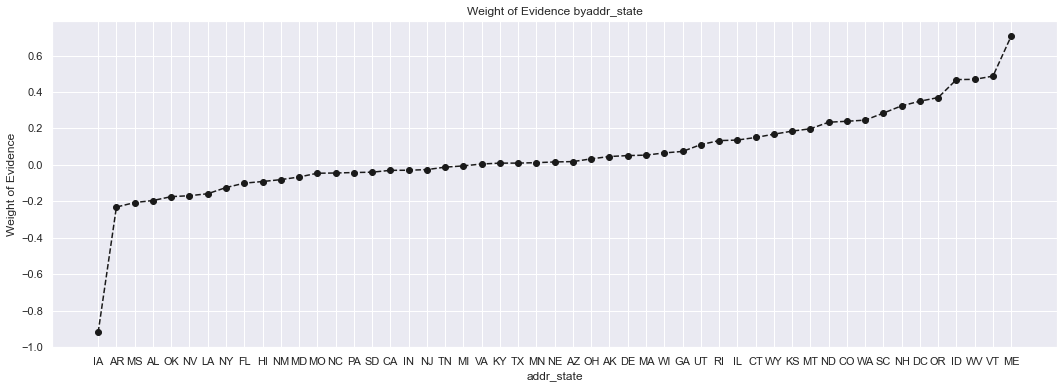

In [47]:
plot_by_woe(df_temp)

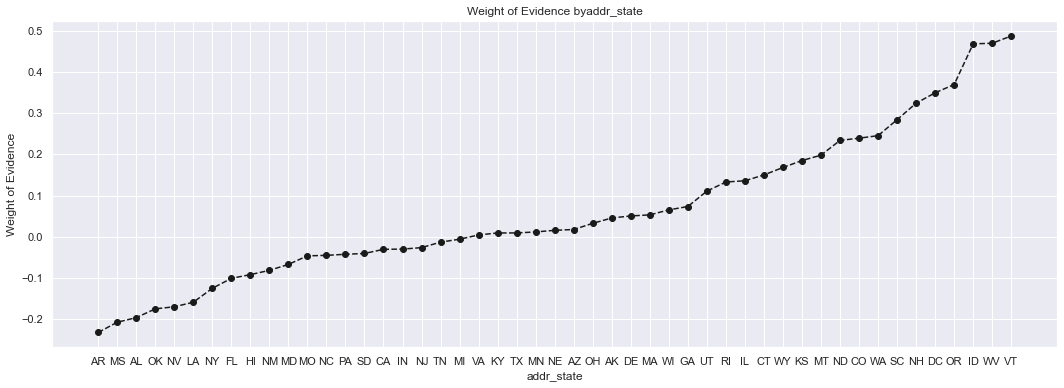

In [48]:
plot_by_woe(df_temp.loc[1:49, :])

In [49]:
df_inputs_prepr['addr_state:IA_AR_MS_AL'] = sum([df_inputs_prepr['addr_state:IA'] + df_inputs_prepr['addr_state:AR'] + df_inputs_prepr['addr_state:MS'] +
                                                df_inputs_prepr['addr_state:AL']])

df_inputs_prepr['addr_state:OK_NV_LA'] = sum([df_inputs_prepr['addr_state:OK'] + df_inputs_prepr['addr_state:NV'] + df_inputs_prepr['addr_state:LA']])

df_inputs_prepr['addr_state:HI_NM'] = sum([df_inputs_prepr['addr_state:HI'] + df_inputs_prepr['addr_state:NM']])

df_inputs_prepr['addr_state:MD_MO_NC_PA_SD'] = sum([df_inputs_prepr['addr_state:MD'] + df_inputs_prepr['addr_state:MO'] + df_inputs_prepr['addr_state:NC'] +
                                                df_inputs_prepr['addr_state:PA'] + df_inputs_prepr['addr_state:SD']])

df_inputs_prepr['addr_state:IN_NJ_TN_MI_VA_KY'] = sum([df_inputs_prepr['addr_state:IN'] + df_inputs_prepr['addr_state:NJ'] + df_inputs_prepr['addr_state:TN'] +
                                                df_inputs_prepr['addr_state:MI'] + df_inputs_prepr['addr_state:VA'] + df_inputs_prepr['addr_state:KY']])

df_inputs_prepr['addr_state:MN_NE_AZ'] = sum([df_inputs_prepr['addr_state:MN'] + df_inputs_prepr['addr_state:NE'] + df_inputs_prepr['addr_state:AZ']])

df_inputs_prepr['addr_state:OH_AK_DE_MA_WI_GA'] = sum([df_inputs_prepr['addr_state:OH'] + df_inputs_prepr['addr_state:AK'] + df_inputs_prepr['addr_state:DE'] +
                                                df_inputs_prepr['addr_state:MA'] + df_inputs_prepr['addr_state:WI'] + df_inputs_prepr['addr_state:GA']])

df_inputs_prepr['addr_state:UT_RI_IL_CT'] = sum([df_inputs_prepr['addr_state:UT'] + df_inputs_prepr['addr_state:RI'] + df_inputs_prepr['addr_state:IL'] +
                                                df_inputs_prepr['addr_state:CT']])

df_inputs_prepr['addr_state:WY_KS_MT'] = sum([df_inputs_prepr['addr_state:WY'] + df_inputs_prepr['addr_state:KS'] + df_inputs_prepr['addr_state:MT']])

df_inputs_prepr['addr_state:ND_CO_WA'] = sum([df_inputs_prepr['addr_state:ND'] + df_inputs_prepr['addr_state:CO'] + df_inputs_prepr['addr_state:WA']])

df_inputs_prepr['addr_state:SC_NH'] = sum([df_inputs_prepr['addr_state:SC'] + df_inputs_prepr['addr_state:NH']])

df_inputs_prepr['addr_state:DC_OR'] = sum([df_inputs_prepr['addr_state:DC'] + df_inputs_prepr['addr_state:OR']])

df_inputs_prepr['addr_state:ID_WV_VT'] = sum([df_inputs_prepr['addr_state:ID'] + df_inputs_prepr['addr_state:WV'] + df_inputs_prepr['addr_state:VT']])


<ipython-input-49-73b384b6f275>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_inputs_prepr['addr_state:IA_AR_MS_AL'] = sum([df_inputs_prepr['addr_state:IA'] + df_inputs_prepr['addr_state:AR'] + df_inputs_prepr['addr_state:MS'] +
<ipython-input-49-73b384b6f275>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_inputs_prepr['addr_state:OK_NV_LA'] = sum([df_inputs_prepr['addr_state:OK'] + df_inputs_prepr['addr_state:NV'] + df_inputs_prepr['addr_state:LA']])
<ipython-input-49-73b384b6f275>:6: SettingWit

In [50]:
df_temp = woe_discrete(df_inputs_prepr, 'verification_status', df_targets_prepr)
df_temp

,verification_status,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,Verified,573143,0.81909,0.24489,469457.00000,103686.00000,0.23057,0.34075,-0.39061,NaN,NaN,0.09778
1,Source Verified,914335,0.86437,0.39068,790327.00000,124008.00000,0.38816,0.40753,-0.04872,0.04528,0.34189,0.09778
2,Not Verified,852915,0.91020,0.36443,776321.00000,76594.00000,0.38128,0.25172,0.41523,0.04582,0.46395,0.09778


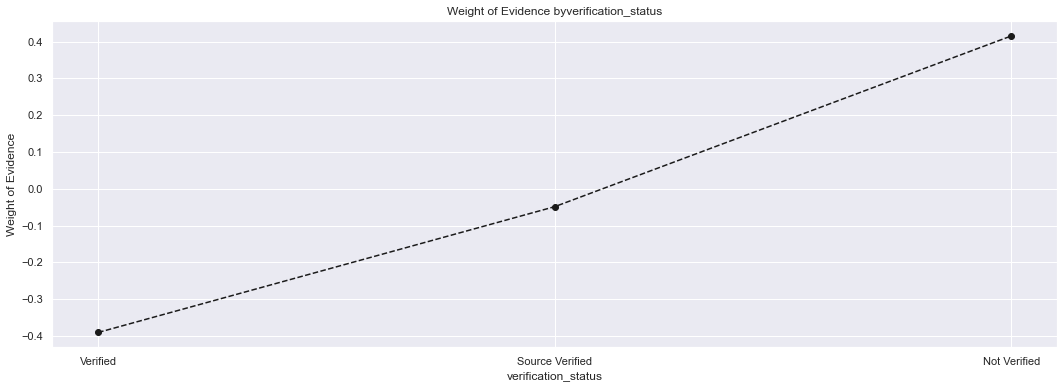

In [51]:
plot_by_woe(df_temp)

In [52]:
df_temp = woe_discrete(df_inputs_prepr, 'purpose', df_targets_prepr)
df_temp

,purpose,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,educational,350,0.79429,0.00015,278.00000,72.00000,0.00014,0.00024,-0.54986,NaN,NaN,0.02268
1,small_business,23930,0.79536,0.01022,19033.00000,4897.00000,0.00935,0.01609,-0.54327,0.00108,0.00660,0.02268
2,renewable_energy,1406,0.83286,0.00060,1171.00000,235.00000,0.00058,0.00077,-0.29479,0.03750,0.24848,0.02268
3,moving,15361,0.83946,0.00656,12895.00000,2466.00000,0.00633,0.00810,-0.24658,0.00660,0.04821,0.02268
4,debt_consolidation,1310414,0.85984,0.55991,1126744.00000,183670.00000,0.55338,0.60361,-0.08687,0.02037,0.15970,0.02268
5,house,15673,0.86320,0.00670,13529.00000,2144.00000,0.00664,0.00705,-0.05866,0.00337,0.02822,0.02268
6,medical,28229,0.86347,0.01206,24375.00000,3854.00000,0.01197,0.01267,-0.05637,0.00027,0.00228,0.02268
7,other,141867,0.86482,0.06062,122690.00000,19177.00000,0.06026,0.06302,-0.04487,0.00135,0.01150,0.02268
8,major_purchase,50228,0.87214,0.02146,43806.00000,6422.00000,0.02151,0.02111,0.01922,0.00732,0.06409,0.02268
9,wedding,1918,0.87591,0.00082,1680.00000,238.00000,0.00083,0.00078,0.05346,0.00377,0.03424,0.02268


In [53]:
df_temp.sort_values('prop_n_obs')

,purpose,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,educational,350,0.79429,0.00015,278.00000,72.00000,0.00014,0.00024,-0.54986,NaN,NaN,0.02268
2,renewable_energy,1406,0.83286,0.00060,1171.00000,235.00000,0.00058,0.00077,-0.29479,0.03750,0.24848,0.02268
9,wedding,1918,0.87591,0.00082,1680.00000,238.00000,0.00083,0.00078,0.05346,0.00377,0.03424,0.02268
3,moving,15361,0.83946,0.00656,12895.00000,2466.00000,0.00633,0.00810,-0.24658,0.00660,0.04821,0.02268
5,house,15673,0.86320,0.00670,13529.00000,2144.00000,0.00664,0.00705,-0.05866,0.00337,0.02822,0.02268
10,vacation,16072,0.87992,0.00687,14142.00000,1930.00000,0.00695,0.00634,0.09081,0.00400,0.03735,0.02268
13,car,23816,0.89872,0.01018,21404.00000,2412.00000,0.01051,0.00793,0.28230,0.00427,0.04608,0.02268
1,small_business,23930,0.79536,0.01022,19033.00000,4897.00000,0.00935,0.01609,-0.54327,0.00108,0.00660,0.02268
6,medical,28229,0.86347,0.01206,24375.00000,3854.00000,0.01197,0.01267,-0.05637,0.00027,0.00228,0.02268
8,major_purchase,50228,0.87214,0.02146,43806.00000,6422.00000,0.02151,0.02111,0.01922,0.00732,0.06409,0.02268


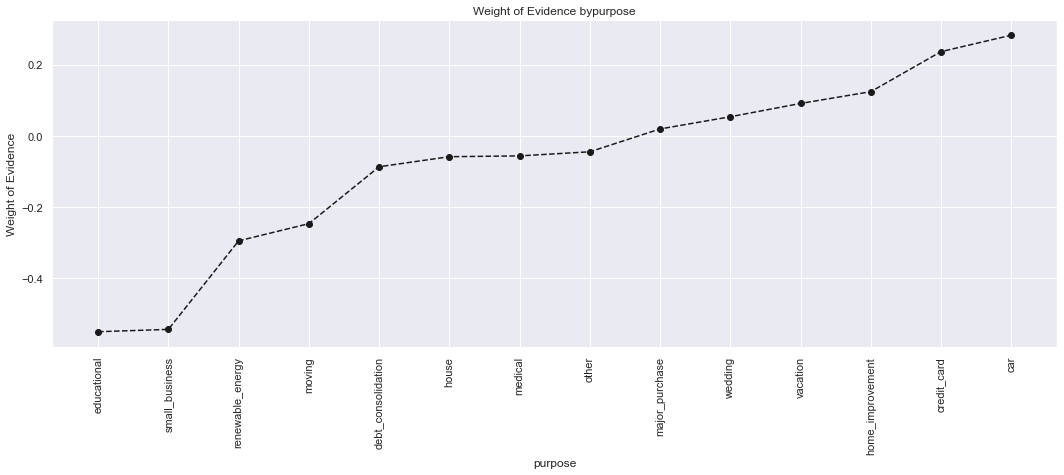

In [54]:
plot_by_woe(df_temp, 90)

In [55]:
df_inputs_prepr['purpose:educ_smallbus'] = sum([df_inputs_prepr['purpose:educational'] + df_inputs_prepr['purpose:small_business']])

df_inputs_prepr['purpose:renewenergy_moving'] = sum([df_inputs_prepr['purpose:renewable_energy'] + df_inputs_prepr['purpose:moving']])

df_inputs_prepr['purpose:house_medical_other'] = sum([df_inputs_prepr['purpose:house'] + df_inputs_prepr['purpose:medical'] +
                                                      df_inputs_prepr['purpose:other']])

df_inputs_prepr['purpose:majorpur_wedding_vac_homeimprov'] = sum([df_inputs_prepr['purpose:major_purchase'] + df_inputs_prepr['purpose:wedding'] +
                                                                  df_inputs_prepr['purpose:vacation'] + df_inputs_prepr['purpose:home_improvement']])
                      
df_inputs_prepr['purpose:credit_car'] = sum([df_inputs_prepr['purpose:credit_card'] + df_inputs_prepr['purpose:car']])

<ipython-input-55-452d17fbabc2>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_inputs_prepr['purpose:educ_smallbus'] = sum([df_inputs_prepr['purpose:educational'] + df_inputs_prepr['purpose:small_business']])
<ipython-input-55-452d17fbabc2>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_inputs_prepr['purpose:renewenergy_moving'] = sum([df_inputs_prepr['purpose:renewable_energy'] + df_inputs_prepr['purpose:moving']])
<ipython-input-55-452d17fbabc2>:5: SettingWithCopyWarning: 
A value is trying to b

In [56]:
df_temp = woe_discrete(df_inputs_prepr, 'initial_list_status', df_targets_prepr)
df_temp

,initial_list_status,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,f,628653,0.83431,0.26861,524490.00000,104163.00000,0.25759,0.34232,-0.28435,NaN,NaN,0.03436
1,w,1711740,0.88309,0.73139,1511615.00000,200125.00000,0.74241,0.65768,0.12117,0.04878,0.40552,0.03436


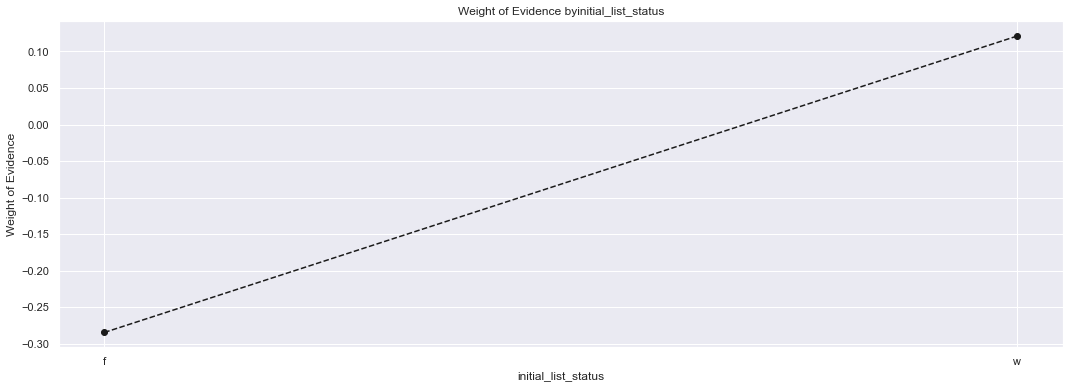

In [57]:
plot_by_woe(df_temp)

### Preprocessing Continuous Variables

In [58]:
def woe_ordered_continuous(df, discrete_variable_name, good_bad_variable_df):
    df = pd.concat([df[discrete_variable_name], good_bad_variable_df], axis = 1)
    df = pd.concat([df.groupby(df.columns.values[0], as_index=False)[df.columns.values[1]].count(),
                    df.groupby(df.columns.values[0], as_index=False)[df.columns.values[1]].mean()], axis=1)
    df = df.iloc[:, [0,1,3]]
    df.columns = [df.columns.values[0], 'n_obs', 'prop_good']
    df['prop_n_obs'] = df['n_obs'] / df['n_obs'].sum()
    df['n_good'] = df['prop_good'] * df['n_obs']
    df['n_bad'] = (1 - df['prop_good']) * df['n_obs']
    df['prop_n_good'] = df['n_good'] / df['n_good'].sum()
    df['prop_n_bad'] = df['n_bad'] / df['n_bad'].sum()
    df['WoE'] = np.log(df['prop_n_good'] / df['prop_n_bad'])
    df['diff_prop_good'] = df['prop_good'].diff().abs()
    df['diff_WoE'] = df['WoE'].diff().abs()
    df['IV'] = (df['prop_n_good'] - df['prop_n_bad']) * df['WoE']
    df['IV'] = df['IV'].sum()
    return df

In [59]:
df_inputs_prepr['term_int'].unique()

array([36., 60.])

In [60]:
df_temp = woe_ordered_continuous(df_inputs_prepr, 'term_int', df_targets_prepr)
df_temp

,term_int,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,36.00000,1647761,0.88916,0.70405,1465126.00000,182635.00000,0.71957,0.60020,0.18139,NaN,NaN,0.06398
1,60.00000,692632,0.82436,0.29595,570979.00000,121653.00000,0.28043,0.39980,-0.35464,0.06480,0.53603,0.06398


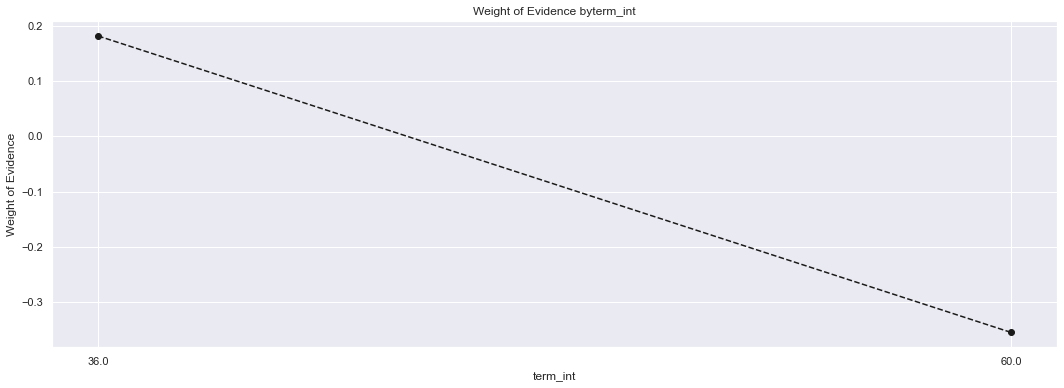

In [61]:
plot_by_woe(df_temp)

In [62]:
df_inputs_prepr['term:36'] = np.where((df_inputs_prepr['term_int'] == 36), 1, 0)
df_inputs_prepr['term:60'] = np.where((df_inputs_prepr['term_int'] == 60), 1, 0)

<ipython-input-62-28b0f1ada17d>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_inputs_prepr['term:36'] = np.where((df_inputs_prepr['term_int'] == 36), 1, 0)
<ipython-input-62-28b0f1ada17d>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_inputs_prepr['term:60'] = np.where((df_inputs_prepr['term_int'] == 60), 1, 0)


In [63]:
df_inputs_prepr['emp_length_int'].unique()

array([ 0.,  3.,  2., 10.,  7.,  8.,  4.,  5.,  1.,  6.,  9.])

In [64]:
df_temp = woe_ordered_continuous(df_inputs_prepr, 'emp_length_int', df_targets_prepr)
df_temp

,emp_length_int,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,0.00000,381979,0.86092,0.16321,328855.00000,53124.00000,0.16151,0.17458,-0.07783,NaN,NaN,0.00310
1,1.00000,155319,0.86593,0.06636,134496.00000,20823.00000,0.06606,0.06843,-0.03534,0.00501,0.04249,0.00310
2,2.00000,209105,0.87025,0.08935,181974.00000,27131.00000,0.08937,0.08916,0.00237,0.00432,0.03771,0.00310
3,3.00000,186113,0.86848,0.07952,161635.00000,24478.00000,0.07938,0.08044,-0.01325,0.00177,0.01562,0.00310
4,4.00000,141019,0.87010,0.06025,122700.00000,18319.00000,0.06026,0.06020,0.00098,0.00162,0.01424,0.00310
5,5.00000,145996,0.87170,0.06238,127264.00000,18732.00000,0.06250,0.06156,0.01521,0.00160,0.01423,0.00310
6,6.00000,104565,0.87101,0.04468,91077.00000,13488.00000,0.04473,0.04433,0.00909,0.00069,0.00613,0.00310
7,7.00000,92740,0.86684,0.03963,80391.00000,12349.00000,0.03948,0.04058,-0.02749,0.00417,0.03658,0.00310
8,8.00000,90260,0.85990,0.03857,77615.00000,12645.00000,0.03812,0.04156,-0.08632,0.00694,0.05883,0.00310
9,9.00000,76257,0.86219,0.03258,65748.00000,10509.00000,0.03229,0.03454,-0.06722,0.00228,0.01910,0.00310


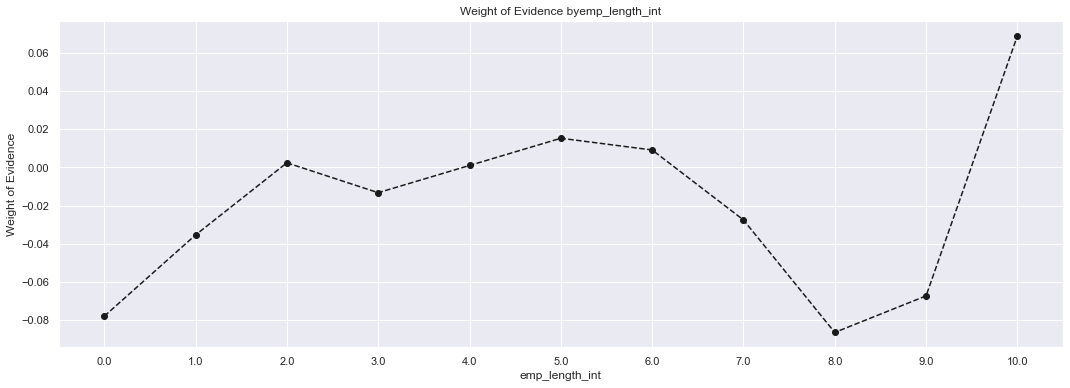

In [65]:
plot_by_woe(df_temp)

In [66]:
df_inputs_prepr['emp_length:0'] = np.where(df_inputs_prepr['emp_length_int'].isin([0]),1,0)
df_inputs_prepr['emp_length:1'] = np.where(df_inputs_prepr['emp_length_int'].isin([1]),1,0)
df_inputs_prepr['emp_length:2-4'] = np.where(df_inputs_prepr['emp_length_int'].isin([2,3,4]),1,0)
df_inputs_prepr['emp_length:5-6'] = np.where(df_inputs_prepr['emp_length_int'].isin([5,6]),1,0)
df_inputs_prepr['emp_length:7'] = np.where(df_inputs_prepr['emp_length_int'].isin([7]),1,0)
df_inputs_prepr['emp_length:8-9'] = np.where(df_inputs_prepr['emp_length_int'].isin([8,9]),1,0)
df_inputs_prepr['emp_length:10'] = np.where(df_inputs_prepr['emp_length_int'].isin([10]),1,0)

<ipython-input-66-b210be96e068>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_inputs_prepr['emp_length:0'] = np.where(df_inputs_prepr['emp_length_int'].isin([0]),1,0)
<ipython-input-66-b210be96e068>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_inputs_prepr['emp_length:1'] = np.where(df_inputs_prepr['emp_length_int'].isin([1]),1,0)
<ipython-input-66-b210be96e068>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer]

In [67]:
df_inputs_prepr['mths_since_issue_d'].unique()

array([ 72.,  75.,  37.,  42.,  62.,  71.,  20.,  27.,  63.,  86.,  69.,
        64.,  57.,  51.,  34., 100.,  32.,  13.,  21.,  49.,  31.,  23.,
        54.,  25.,  79.,  93.,  38.,  53.,  28., 110.,  16.,  56.,  43.,
        98.,  35.,  89.,  30.,  40., 103.,  26.,  77.,  58.,  78.,  46.,
        65.,  41.,  76.,  47.,  66., 111.,  24.,  87.,  39.,  22.,  81.,
        70.,  50.,  99.,  33.,  45.,  96.,  29.,  68., 106.,  44.,  83.,
        59.,  55.,  85., 135.,  67.,  94.,  84.,  60., 137., 104.,  91.,
       102.,  48., 149.,  95.,  52.,  19.,  97.,  88.,  18.,  36., 134.,
        61.,  73.,  90.,  14., 129.,  82.,  74.,  92., 108., 119., 114.,
        80., 113.,  15., 132., 112., 115., 153., 101., 121., 117., 107.,
        17., 105., 144., 124., 126., 142., 128., 116., 123., 118., 120.,
       109., 133., 122., 164., 127., 155., 141., 143., 125., 130., 152.,
       147., 140., 163., 150., 168., 131., 138., 145., 139., 136., 158.,
       165., 166., 156., 151., 154., 148., 159., 14

In [68]:
df_inputs_prepr['mths_since_issue_d_factor'] = pd.cut(df_inputs_prepr['mths_since_issue_d'], 50)
df_inputs_prepr['mths_since_issue_d_factor'].head(100)

<ipython-input-68-d63ee97db225>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_inputs_prepr['mths_since_issue_d_factor'] = pd.cut(df_inputs_prepr['mths_since_issue_d'], 50)


1986640      (70.24, 73.42]
2097124       (73.42, 76.6]
728646       (35.26, 38.44]
718214       (35.26, 38.44]
700110        (41.62, 44.8]
2572469       (60.7, 63.88]
1932559      (70.24, 73.42]
1768836      (19.36, 22.54]
1351671       (25.72, 28.9]
2612467       (60.7, 63.88]
1579136      (82.96, 86.14]
2420466      (67.06, 70.24]
2441348      (63.88, 67.06]
2804050      (54.34, 57.52]
336253       (47.98, 51.16]
866302       (32.08, 35.26]
125933      (98.86, 102.04]
1030472       (28.9, 32.08]
1844289     (12.841, 16.18]
676710        (41.62, 44.8]
1822362      (19.36, 22.54]
231967       (47.98, 51.16]
969683        (28.9, 32.08]
1409067      (22.54, 25.72]
2903601      (51.16, 54.34]
1254718      (22.54, 25.72]
2218808       (76.6, 79.78]
2923366      (51.16, 54.34]
1715844       (92.5, 95.68]
772724       (35.26, 38.44]
2863341      (51.16, 54.34]
1118321       (25.72, 28.9]
204845      (108.4, 111.58]
776249       (35.26, 38.44]
708686        (41.62, 44.8]
1931953      (70.24,

In [69]:
df_inputs_prepr['mths_since_issue_d'].nunique()

160

In [70]:
df_inputs_prepr['total_rev_hi_lim'].nunique()

31062

In [71]:
df_temp = woe_ordered_continuous(df_inputs_prepr, 'mths_since_issue_d_factor', df_targets_prepr)
df_temp

,mths_since_issue_d_factor,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,"(12.841, 16.18]",26201,0.99924,0.01120,26181.00000,20.00000,0.01286,0.00007,5.27624,NaN,NaN,0.55539
1,"(16.18, 19.36]",29085,0.99752,0.01243,29013.00000,72.00000,0.01425,0.00024,4.09801,0.00171,1.17822,0.55539
2,"(19.36, 22.54]",95853,0.99356,0.04096,95236.00000,617.00000,0.04677,0.00203,3.13842,0.00396,0.95959,0.55539
3,"(22.54, 25.72]",105065,0.98122,0.04489,103092.00000,1973.00000,0.05063,0.00648,2.05525,0.01234,1.08318,0.55539
4,"(25.72, 28.9]",111642,0.96611,0.04770,107859.00000,3783.00000,0.05297,0.01243,1.44949,0.01511,0.60576,0.55539
5,"(28.9, 32.08]",129029,0.94324,0.05513,121705.00000,7324.00000,0.05977,0.02407,0.90962,0.02288,0.53986,0.55539
6,"(32.08, 35.26]",100547,0.92266,0.04296,92771.00000,7776.00000,0.04556,0.02555,0.57827,0.02057,0.33135,0.55539
7,"(35.26, 38.44]",105395,0.90775,0.04503,95672.00000,9723.00000,0.04699,0.03195,0.38561,0.01492,0.19266,0.55539
8,"(38.44, 41.62]",105040,0.88573,0.04488,93037.00000,12003.00000,0.04569,0.03945,0.14702,0.02202,0.23859,0.55539
9,"(41.62, 44.8]",91317,0.87398,0.03902,79809.00000,11508.00000,0.03920,0.03782,0.03577,0.01175,0.11125,0.55539


In [72]:
df_temp.sort_values('prop_n_obs')

,mths_since_issue_d_factor,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
49,"(168.82, 172.0]",176,0.79545,0.00008,140.00000,36.00000,0.00007,0.00012,-0.54270,0.09771,0.52152,0.55539
45,"(156.1, 159.28]",238,0.82773,0.00010,197.00000,41.00000,0.00010,0.00013,-0.33119,0.01003,0.07201,0.55539
48,"(165.64, 168.82]",311,0.69775,0.00013,217.00000,94.00000,0.00011,0.00031,-1.06422,0.06949,0.35620,0.55539
46,"(159.28, 162.46]",383,0.77023,0.00016,295.00000,88.00000,0.00014,0.00029,-0.69118,0.05750,0.35999,0.55539
44,"(152.92, 156.1]",678,0.83776,0.00029,568.00000,110.00000,0.00028,0.00036,-0.25918,0.02795,0.22191,0.55539
43,"(149.74, 152.92]",767,0.86571,0.00033,664.00000,103.00000,0.00033,0.00034,-0.03727,0.01432,0.11798,0.55539
47,"(162.46, 165.64]",812,0.76724,0.00035,623.00000,189.00000,0.00031,0.00062,-0.70802,0.00299,0.01684,0.55539
42,"(146.56, 149.74]",969,0.85139,0.00041,825.00000,144.00000,0.00041,0.00047,-0.15525,0.01319,0.10832,0.55539
41,"(143.38, 146.56]",1248,0.86458,0.00053,1079.00000,169.00000,0.00053,0.00056,-0.04693,0.00509,0.04419,0.55539
40,"(140.2, 143.38]",1596,0.86967,0.00068,1388.00000,208.00000,0.00068,0.00068,-0.00274,0.01597,0.14889,0.55539


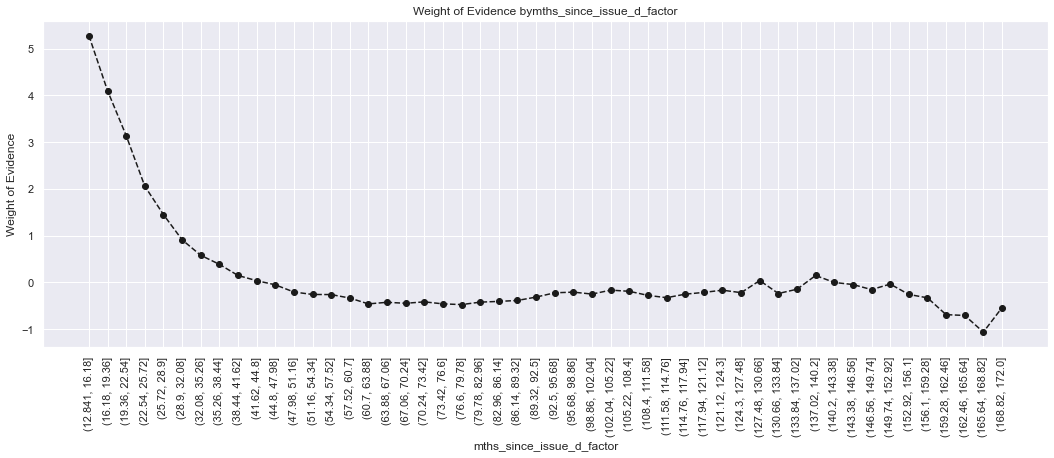

In [73]:
plot_by_woe(df_temp, 90)

In [74]:
df_inputs_prepr['mths_since_issue_d:12-16'] = np.where(df_inputs_prepr['mths_since_issue_d_factor'].isin(range(12,17)),1,0)                                                       
df_inputs_prepr['mths_since_issue_d:17-19'] = np.where(df_inputs_prepr['mths_since_issue_d_factor'].isin(range(17,20)),1,0)
df_inputs_prepr['mths_since_issue_d:20-22'] = np.where(df_inputs_prepr['mths_since_issue_d_factor'].isin(range(20,23)),1,0)
df_inputs_prepr['mths_since_issue_d:23-25'] = np.where(df_inputs_prepr['mths_since_issue_d_factor'].isin(range(23,26)),1,0)
df_inputs_prepr['mths_since_issue_d:26-28'] = np.where(df_inputs_prepr['mths_since_issue_d_factor'].isin(range(26,29)),1,0)
df_inputs_prepr['mths_since_issue_d:29-41'] = np.where(df_inputs_prepr['mths_since_issue_d_factor'].isin(range(29,42)),1,0)
df_inputs_prepr['mths_since_issue_d:42-60'] = np.where(df_inputs_prepr['mths_since_issue_d_factor'].isin(range(42,61)),1,0)
df_inputs_prepr['mths_since_issue_d:61-108'] = np.where(df_inputs_prepr['mths_since_issue_d_factor'].isin(range(61,109)),1,0)
df_inputs_prepr['mths_since_issue_d:109-173'] = np.where(df_inputs_prepr['mths_since_issue_d_factor'].isin(range(109,173)),1,0)

<ipython-input-74-bd4df6065142>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_inputs_prepr['mths_since_issue_d:12-16'] = np.where(df_inputs_prepr['mths_since_issue_d_factor'].isin(range(12,17)),1,0)
<ipython-input-74-bd4df6065142>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_inputs_prepr['mths_since_issue_d:17-19'] = np.where(df_inputs_prepr['mths_since_issue_d_factor'].isin(range(17,20)),1,0)
<ipython-input-74-bd4df6065142>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a

In [75]:
df_inputs_prepr['int_rate'].unique()

array([' 22.99%', '  9.17%', ' 10.47%', '  7.21%', '  7.34%', ' 19.99%',
       '  5.32%', ' 12.40%', ' 17.74%', ' 22.39%', ' 14.99%', ' 11.99%',
       ' 15.31%', '  7.07%', '  8.19%', '  6.03%', ' 11.31%', ' 18.24%',
       ' 14.07%', ' 11.71%', ' 16.02%', ' 17.19%', ' 13.08%', ' 11.44%',
       ' 15.24%', ' 13.33%', '  6.99%', '  9.67%', ' 10.08%', ' 18.06%',
       '  8.81%', ' 18.75%', ' 19.92%', ' 17.47%', ' 20.55%', '  9.02%',
       '  7.24%', ' 18.45%', ' 22.70%', ' 23.43%', ' 10.33%', '  6.46%',
       ' 18.85%', '  9.58%', ' 16.29%', '  7.02%', ' 13.49%', ' 17.57%',
       ' 18.84%', ' 13.59%', ' 15.04%', ' 18.99%', '  6.24%', ' 20.00%',
       ' 18.25%', ' 11.14%', ' 15.61%', ' 16.95%', '  6.11%', ' 16.55%',
       ' 15.59%', ' 23.05%', ' 14.08%', ' 28.80%', ' 13.99%', ' 13.68%',
       ' 13.58%', ' 14.47%', '  7.49%', '  9.93%', '  8.60%', '  6.89%',
       ' 14.30%', ' 11.47%', ' 10.16%', ' 18.49%', ' 18.55%', ' 12.62%',
       '  8.49%', '  6.49%', ' 19.52%', ' 17.97%', 

In [76]:
df_inputs_prepr['int_rate'] = df_inputs_prepr['int_rate'].str.strip(to_strip='%')
df_inputs_prepr['int_rate'].head()

<ipython-input-76-c362b32bdce1>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_inputs_prepr['int_rate'] = df_inputs_prepr['int_rate'].str.strip(to_strip='%')


1986640     22.99
2097124      9.17
728646      10.47
718214       7.21
700110       7.34
Name: int_rate, dtype: object

In [77]:
df_inputs_prepr['int_rate'] = pd.to_numeric(df_inputs_prepr['int_rate'])

<ipython-input-77-41fb30684c3e>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_inputs_prepr['int_rate'] = pd.to_numeric(df_inputs_prepr['int_rate'])


In [78]:
df_inputs_prepr['int_rate_factor'] = pd.cut(df_inputs_prepr['int_rate'], 50)
df_inputs_prepr['int_rate_factor'].head()

<ipython-input-78-416f2858f503>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_inputs_prepr['int_rate_factor'] = pd.cut(df_inputs_prepr['int_rate'], 50)


1986640    (22.772, 23.286]
2097124      (8.905, 9.419]
728646      (10.446, 10.96]
718214       (6.851, 7.364]
700110       (6.851, 7.364]
Name: int_rate_factor, dtype: category
Categories (50, interval[float64]): [(5.284, 5.824] < (5.824, 6.337] < (6.337, 6.851] < (6.851, 7.364] ... (28.936, 29.449] < (29.449, 29.963] < (29.963, 30.476] < (30.476, 30.99]]

In [79]:
df_temp = woe_ordered_continuous(df_inputs_prepr, 'int_rate_factor', df_targets_prepr)
df_temp

,int_rate_factor,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,"(5.284, 5.824]",45398,0.97233,0.01940,44142.00000,1256.00000,0.02168,0.00413,1.65866,NaN,NaN,0.46733
1,"(5.824, 6.337]",39386,0.96986,0.01683,38199.00000,1187.00000,0.01876,0.00390,1.57056,0.00247,0.08810,0.46733
2,"(6.337, 6.851]",75413,0.97392,0.03222,73446.00000,1967.00000,0.03607,0.00646,1.71922,0.00405,0.14866,0.46733
3,"(6.851, 7.364]",99309,0.95849,0.04243,95187.00000,4122.00000,0.04675,0.01355,1.23869,0.01542,0.48054,0.46733
4,"(7.364, 7.878]",67044,0.95915,0.02865,64305.00000,2739.00000,0.03158,0.00900,1.25523,0.00065,0.01654,0.46733
5,"(7.878, 8.392]",156917,0.94127,0.06705,147702.00000,9215.00000,0.07254,0.03028,0.87354,0.01787,0.38168,0.46733
6,"(8.392, 8.905]",67787,0.96210,0.02896,65218.00000,2569.00000,0.03203,0.00844,1.33340,0.02083,0.45985,0.46733
7,"(8.905, 9.419]",38996,0.90227,0.01666,35185.00000,3811.00000,0.01728,0.01252,0.32191,0.05983,1.01149,0.46733
8,"(9.419, 9.932]",83046,0.90942,0.03548,75524.00000,7522.00000,0.03709,0.02472,0.40580,0.00715,0.08389,0.46733
9,"(9.932, 10.446]",95089,0.92855,0.04063,88295.00000,6794.00000,0.04336,0.02233,0.66382,0.01913,0.25803,0.46733


In [80]:
df_temp.sort_values('n_obs')

,int_rate_factor,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
46,"(28.936, 29.449]",385,0.57662,0.00016,222.00000,163.00000,0.00011,0.00054,-1.59189,0.24225,1.19983,0.46733
44,"(27.908, 28.422]",622,0.51608,0.00027,321.00000,301.00000,0.00016,0.00099,-1.83649,0.02184,0.08737,0.46733
43,"(27.395, 27.908]",868,0.49424,0.00037,429.00000,439.00000,0.00021,0.00144,-1.92386,0.19452,0.81736,0.46733
48,"(29.963, 30.476]",1514,0.62814,0.00065,951.00000,563.00000,0.00047,0.00185,-1.37658,0.03475,0.14627,0.46733
47,"(29.449, 29.963]",1874,0.59338,0.00080,1112.00000,762.00000,0.00055,0.00250,-1.52285,0.01676,0.06904,0.46733
41,"(26.368, 26.881]",2677,0.62421,0.00114,1671.00000,1006.00000,0.00082,0.00331,-1.39338,0.02859,0.12391,0.46733
42,"(26.881, 27.395]",3576,0.68876,0.00153,2463.00000,1113.00000,0.00121,0.00366,-1.10650,0.06455,0.28688,0.46733
49,"(30.476, 30.99]",6088,0.59231,0.00260,3606.00000,2482.00000,0.00177,0.00816,-1.52728,0.03582,0.15070,0.46733
37,"(24.313, 24.827]",6385,0.68520,0.00273,4375.00000,2010.00000,0.00215,0.00661,-1.12305,0.03880,0.17451,0.46733
35,"(23.286, 23.8]",6878,0.74004,0.00294,5090.00000,1788.00000,0.00250,0.00588,-0.85464,0.06924,0.39913,0.46733


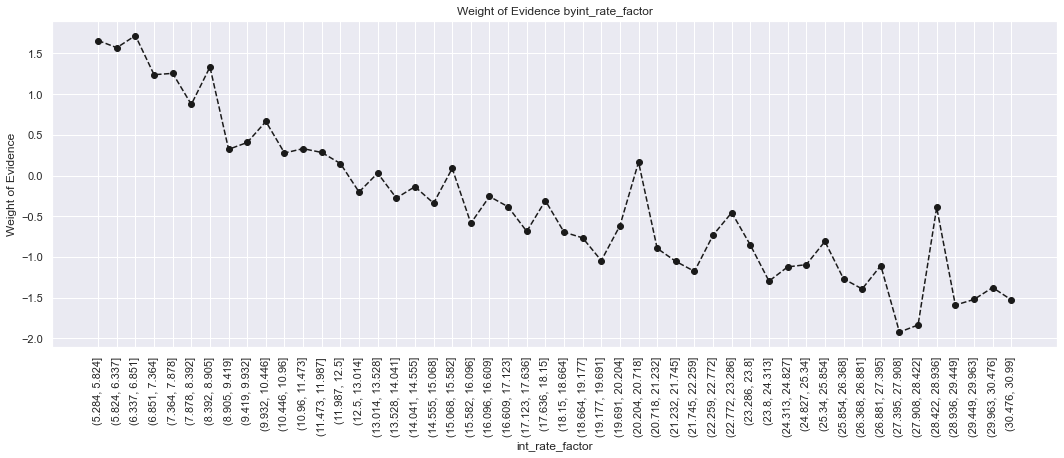

In [81]:
plot_by_woe(df_temp, 90)

In [82]:
df_inputs_prepr['int_rate:<8.905'] = np.where((df_inputs_prepr['int_rate'] <= 8.905),1,0) 
df_inputs_prepr['int_rate:8.905-14.555'] = np.where(((df_inputs_prepr['int_rate'] > 8.905) & (df_inputs_prepr['int_rate'] <= 14.555)),1,0)
df_inputs_prepr['int_rate:14.555-20.204'] = np.where(((df_inputs_prepr['int_rate'] > 14.555) & (df_inputs_prepr['int_rate'] <= 20.204)),1,0)
df_inputs_prepr['int_rate:20.204-27.395'] = np.where(((df_inputs_prepr['int_rate'] > 20.718) & (df_inputs_prepr['int_rate'] <= 27.395)),1,0)
df_inputs_prepr['int_rate:27.395-30.99'] = np.where(((df_inputs_prepr['int_rate'] > 27.395) & (df_inputs_prepr['int_rate'] <= 30.99)),1,0)

<ipython-input-82-cd8ed5570f3a>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_inputs_prepr['int_rate:<8.905'] = np.where((df_inputs_prepr['int_rate'] <= 8.905),1,0)
<ipython-input-82-cd8ed5570f3a>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_inputs_prepr['int_rate:8.905-14.555'] = np.where(((df_inputs_prepr['int_rate'] > 8.905) & (df_inputs_prepr['int_rate'] <= 14.555)),1,0)
<ipython-input-82-cd8ed5570f3a>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataF

In [83]:
df_inputs_prepr['funded_amnt'].nunique()

1571

In [84]:
df_inputs_prepr['funded_amnt'].describe()

count   2340393.00000
mean      15354.65513
std        9479.74929
min         500.00000
25%        8000.00000
50%       13000.00000
75%       20000.00000
max       40000.00000
Name: funded_amnt, dtype: float64

In [85]:
df_inputs_prepr['funded_amnt_factor'] = pd.cut(df_inputs_prepr['funded_amnt'], 50)

<ipython-input-85-4fc315b53a11>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_inputs_prepr['funded_amnt_factor'] = pd.cut(df_inputs_prepr['funded_amnt'], 50)


In [86]:
df_temp = woe_ordered_continuous(df_inputs_prepr, 'funded_amnt_factor', df_targets_prepr)
df_temp

,funded_amnt_factor,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,"(460.5, 1290.0]",15174,0.91591,0.00648,13898.00000,1276.00000,0.00683,0.00419,0.48720,NaN,NaN,0.03635
1,"(1290.0, 2080.0]",33094,0.90630,0.01414,29993.00000,3101.00000,0.01473,0.01019,0.36842,0.00961,0.11878,0.03635
2,"(2080.0, 2870.0]",29066,0.89995,0.01242,26158.00000,2908.00000,0.01285,0.00956,0.29587,0.00635,0.07255,0.03635
3,"(2870.0, 3660.0]",65221,0.89792,0.02787,58563.00000,6658.00000,0.02876,0.02188,0.27346,0.00204,0.02241,0.03635
4,"(3660.0, 4450.0]",50336,0.89195,0.02151,44897.00000,5439.00000,0.02205,0.01787,0.20996,0.00597,0.06351,0.03635
5,"(4450.0, 5240.0]",117461,0.88578,0.05019,104045.00000,13416.00000,0.05110,0.04409,0.14756,0.00616,0.06240,0.03635
6,"(5240.0, 6030.0]",106642,0.89293,0.04557,95224.00000,11418.00000,0.04677,0.03752,0.22022,0.00715,0.07267,0.03635
7,"(6030.0, 6820.0]",36781,0.88826,0.01572,32671.00000,4110.00000,0.01605,0.01351,0.17225,0.00467,0.04798,0.03635
8,"(6820.0, 7610.0]",78062,0.88247,0.03335,68887.00000,9175.00000,0.03383,0.03015,0.11517,0.00579,0.05708,0.03635
9,"(7610.0, 8400.0]",99737,0.87627,0.04262,87397.00000,12340.00000,0.04292,0.04055,0.05680,0.00619,0.05837,0.03635


In [87]:
df_temp.sort_values('n_obs')

,funded_amnt_factor,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
45,"(36050.0, 36840.0]",1242,0.94042,0.00053,1168.00000,74.00000,0.00057,0.00024,0.85816,0.02117,0.32685,0.03635
48,"(38420.0, 39210.0]",1513,0.94712,0.00065,1433.00000,80.00000,0.00070,0.00026,0.98468,0.00074,0.01482,0.03635
46,"(36840.0, 37630.0]",2858,0.94822,0.00122,2710.00000,148.00000,0.00133,0.00049,1.00667,0.00780,0.14851,0.03635
47,"(37630.0, 38420.0]",2877,0.94786,0.00123,2727.00000,150.00000,0.00134,0.00049,0.99950,0.00035,0.00717,0.03635
40,"(32100.0, 32890.0]",3878,0.82182,0.00166,3187.00000,691.00000,0.00157,0.00227,-0.37212,0.05758,0.45801,0.03635
42,"(33680.0, 34470.0]",4760,0.87647,0.00203,4172.00000,588.00000,0.00205,0.00193,0.05860,0.01667,0.14582,0.03635
35,"(28150.0, 28940.0]",5779,0.82782,0.00247,4784.00000,995.00000,0.00235,0.00327,-0.33053,0.02671,0.20034,0.03635
38,"(30520.0, 31310.0]",5860,0.84812,0.00250,4970.00000,890.00000,0.00244,0.00292,-0.18087,0.01267,0.10191,0.03635
41,"(32890.0, 33680.0]",6890,0.85980,0.00294,5924.00000,966.00000,0.00291,0.00317,-0.08722,0.03798,0.28491,0.03635
36,"(28940.0, 29730.0]",7208,0.84725,0.00308,6107.00000,1101.00000,0.00300,0.00362,-0.18760,0.01943,0.14293,0.03635


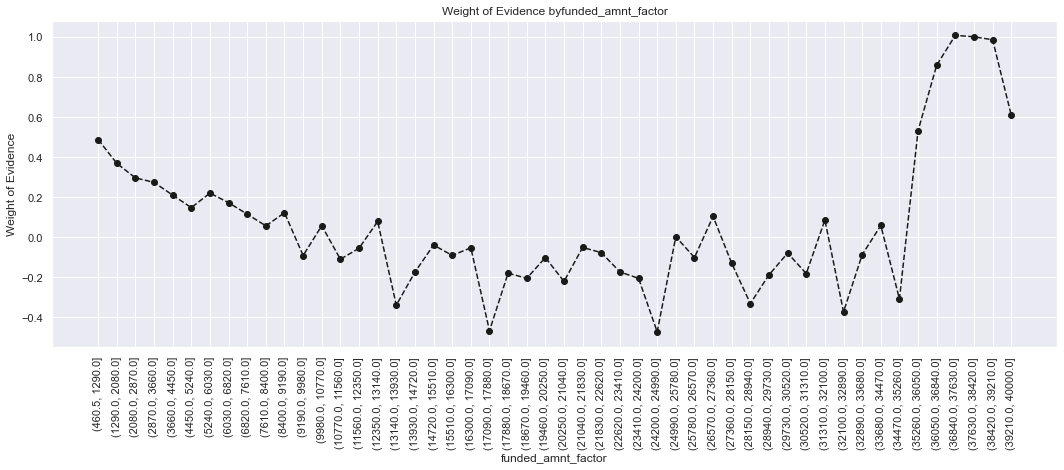

In [88]:
plot_by_woe(df_temp, 90)

In [89]:
df_inputs_prepr['funded_amnt:<13140'] = np.where((df_inputs_prepr['funded_amnt'] <= 13140),1,0)
df_inputs_prepr['funded_amnt:13140-35260'] = np.where(((df_inputs_prepr['funded_amnt'] > 13140) & (df_inputs_prepr['funded_amnt'] <= 35260)),1,0)
df_inputs_prepr['funded_amnt:35260-40000'] = np.where(((df_inputs_prepr['funded_amnt'] > 35260) & (df_inputs_prepr['funded_amnt'] <= 40000)),1,0)

<ipython-input-89-7d73aebf7ee0>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_inputs_prepr['funded_amnt:<13140'] = np.where((df_inputs_prepr['funded_amnt'] <= 13140),1,0)
<ipython-input-89-7d73aebf7ee0>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_inputs_prepr['funded_amnt:13140-35260'] = np.where(((df_inputs_prepr['funded_amnt'] > 13140) & (df_inputs_prepr['funded_amnt'] <= 35260)),1,0)
<ipython-input-89-7d73aebf7ee0>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice

In [90]:
df_inputs_prepr['mths_since_earliest_cr_line'].describe()

count   2340393.00000
mean        252.24341
std          95.91218
min           0.00000
25%         188.00000
50%         237.00000
75%         303.00000
max        1063.00000
Name: mths_since_earliest_cr_line, dtype: float64

In [91]:
df_inputs_prepr['mths_since_earliest_cr_line_factor'] = pd.cut(df_inputs_prepr['mths_since_earliest_cr_line'], 50)

<ipython-input-91-e6cd82f0c659>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_inputs_prepr['mths_since_earliest_cr_line_factor'] = pd.cut(df_inputs_prepr['mths_since_earliest_cr_line'], 50)


In [92]:
df_temp = woe_ordered_continuous(df_inputs_prepr, 'mths_since_earliest_cr_line_factor', df_targets_prepr)
df_temp

,mths_since_earliest_cr_line_factor,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,"(-1.063, 21.26]",24,0.91667,0.00001,22.00000,2.00000,0.00001,0.00001,0.49708,NaN,NaN,inf
1,"(21.26, 42.52]",0,NaN,0.00000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,inf
2,"(42.52, 63.78]",1396,0.98352,0.00060,1373.00000,23.00000,0.00067,0.00008,2.18844,NaN,NaN,inf
3,"(63.78, 85.04]",25887,0.92958,0.01106,24064.00000,1823.00000,0.01182,0.00599,0.67941,0.05395,1.50903,inf
4,"(85.04, 106.3]",53319,0.89630,0.02278,47790.00000,5529.00000,0.02347,0.01817,0.25599,0.03328,0.42342,inf
5,"(106.3, 127.56]",80118,0.88089,0.03423,70575.00000,9543.00000,0.03466,0.03136,0.10005,0.01542,0.15594,inf
6,"(127.56, 148.82]",89395,0.88101,0.03820,78758.00000,10637.00000,0.03868,0.03496,0.10122,0.00012,0.00117,inf
7,"(148.82, 170.08]",144514,0.87881,0.06175,127001.00000,17513.00000,0.06237,0.05755,0.08043,0.00220,0.02079,inf
8,"(170.08, 191.34]",232773,0.87168,0.09946,202903.00000,29870.00000,0.09965,0.09816,0.01505,0.00714,0.06538,inf
9,"(191.34, 212.6]",265189,0.86315,0.11331,228898.00000,36291.00000,0.11242,0.11927,-0.05911,0.00853,0.07417,inf


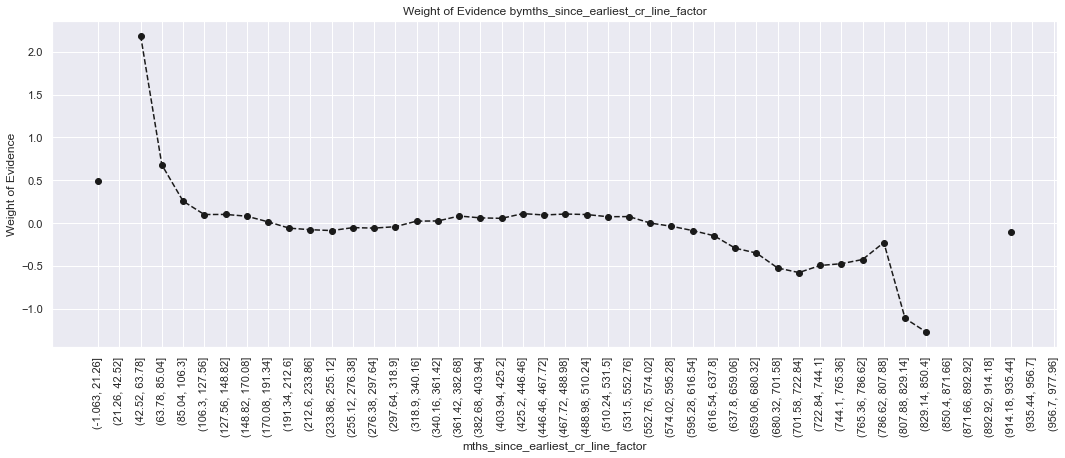

In [93]:
plot_by_woe(df_temp, 90)

In [94]:
df_inputs_prepr['mths_since_earliest_cr_line:<85'] = np.where((df_inputs_prepr['mths_since_earliest_cr_line'] <= 85.04),1,0)
df_inputs_prepr['mths_since_earliest_cr_line:85-106'] = np.where(((df_inputs_prepr['mths_since_earliest_cr_line'] > 85.04) & (df_inputs_prepr['mths_since_earliest_cr_line'] <= 106.3)),1,0)
df_inputs_prepr['mths_since_earliest_cr_line:107-595'] = np.where(((df_inputs_prepr['mths_since_earliest_cr_line'] > 106.3) & (df_inputs_prepr['mths_since_earliest_cr_line'] <= 595.28)),1,0)
df_inputs_prepr['mths_since_earliest_cr_line:595-680'] = np.where(((df_inputs_prepr['mths_since_earliest_cr_line'] > 595.28) & (df_inputs_prepr['mths_since_earliest_cr_line'] <= 680.32)),1,0)
df_inputs_prepr['mths_since_earliest_cr_line:681-935'] = np.where(((df_inputs_prepr['mths_since_earliest_cr_line'] > 680.32) & (df_inputs_prepr['mths_since_earliest_cr_line'] <= 935.44)),1,0)

<ipython-input-94-b160ac6a6558>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_inputs_prepr['mths_since_earliest_cr_line:<85'] = np.where((df_inputs_prepr['mths_since_earliest_cr_line'] <= 85.04),1,0)
<ipython-input-94-b160ac6a6558>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_inputs_prepr['mths_since_earliest_cr_line:85-106'] = np.where(((df_inputs_prepr['mths_since_earliest_cr_line'] > 85.04) & (df_inputs_prepr['mths_since_earliest_cr_line'] <= 106.3)),1,0)
<ipython-input-94-b160ac6a6558>:3: S

In [95]:
df_inputs_prepr['delinq_2yrs'].unique()

array([ 1.,  2.,  0.,  3.,  5.,  4.,  6.,  7., 10., 18.,  9., 13.,  8.,
       12., 16., 17., 11., 14., 15., 22., 19., 21., 26., 25., 23., 42.,
       20., 30., 36., 58., 24., 32., 29., 27., 39., 35.])

In [96]:
df_temp = woe_ordered_continuous(df_inputs_prepr, 'delinq_2yrs', df_targets_prepr)
df_temp

C:\Users\marcu\anaconda3\lib\site-packages\pandas\core\arraylike.py:358: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


,delinq_2yrs,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,0.00000,1925558,0.87344,0.82275,1681855.00000,243703.00000,0.82602,0.80090,0.03088,NaN,NaN,inf
1,1.00000,279497,0.85814,0.11942,239847.00000,39650.00000,0.11780,0.13030,-0.10091,0.01530,0.13179,inf
2,2.00000,78552,0.84864,0.03356,66662.00000,11890.00000,0.03274,0.03907,-0.17688,0.00950,0.07597,inf
3,3.00000,28456,0.84144,0.01216,23944.00000,4512.00000,0.01176,0.01483,-0.23184,0.00720,0.05496,inf
4,4.00000,12684,0.83925,0.00542,10645.00000,2039.00000,0.00523,0.00670,-0.24819,0.00219,0.01635,inf
5,5.00000,6355,0.83887,0.00272,5331.00000,1024.00000,0.00262,0.00337,-0.25100,0.00038,0.00281,inf
6,6.00000,3565,0.84292,0.00152,3005.00000,560.00000,0.00148,0.00184,-0.22072,0.00405,0.03027,inf
7,7.00000,2017,0.83986,0.00086,1694.00000,323.00000,0.00083,0.00106,-0.24362,0.00306,0.02290,inf
8,8.00000,1215,0.84115,0.00052,1022.00000,193.00000,0.00050,0.00063,-0.23399,0.00129,0.00963,inf
9,9.00000,783,0.85441,0.00033,669.00000,114.00000,0.00033,0.00037,-0.13123,0.01325,0.10276,inf


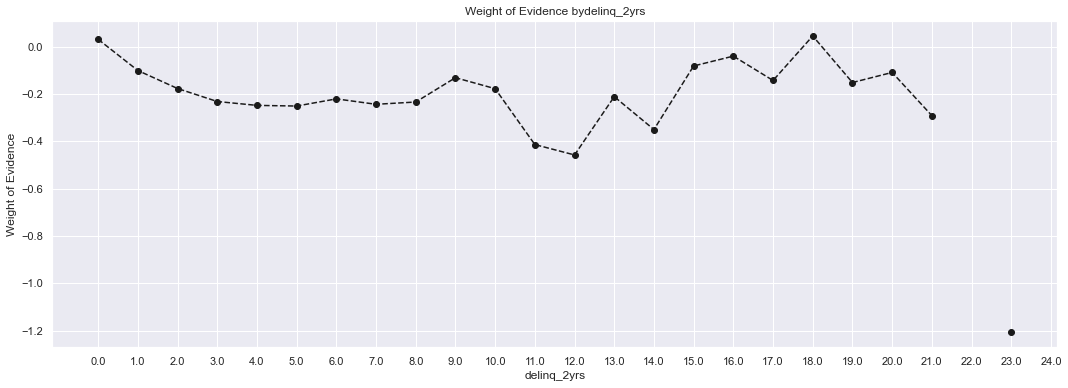

In [97]:
plot_by_woe(df_temp)

In [98]:
df_inputs_prepr['delinq_2yrs:0'] = np.where((df_inputs_prepr['delinq_2yrs'] == 0),1,0)
df_inputs_prepr['delinq_2yrs:1-3'] = np.where(((df_inputs_prepr['delinq_2yrs'] >= 1) & (df_inputs_prepr['delinq_2yrs'] <= 3)),1,0)
df_inputs_prepr['delinq_2yrs:4-21'] = np.where((df_inputs_prepr['delinq_2yrs'] >= 4),1,0)

<ipython-input-98-7e0a73715e8a>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_inputs_prepr['delinq_2yrs:0'] = np.where((df_inputs_prepr['delinq_2yrs'] == 0),1,0)
<ipython-input-98-7e0a73715e8a>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_inputs_prepr['delinq_2yrs:1-3'] = np.where(((df_inputs_prepr['delinq_2yrs'] >= 1) & (df_inputs_prepr['delinq_2yrs'] <= 3)),1,0)
<ipython-input-98-7e0a73715e8a>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try u

In [99]:
df_inputs_prepr['inq_last_6mths'].unique()

array([ 3.,  0.,  2.,  1.,  4.,  5.,  6., 15.,  7.,  9.,  8., 33., 10.,
       11., 12., 13., 18., 14., 27., 24., 28., 16., 31., 17., 20., 19.,
       32.])

In [100]:
df_temp = woe_ordered_continuous(df_inputs_prepr, 'inq_last_6mths', df_targets_prepr)
df_temp

C:\Users\marcu\anaconda3\lib\site-packages\pandas\core\arraylike.py:358: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


,inq_last_6mths,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,0.00000,1450950,0.88805,0.61996,1288519.00000,162431.00000,0.63284,0.53381,0.17018,NaN,NaN,inf
1,1.00000,602703,0.85417,0.25752,514813.00000,87890.00000,0.25284,0.28884,-0.13310,0.03388,0.30328,inf
2,2.00000,198581,0.82435,0.08485,163701.00000,34880.00000,0.08040,0.11463,-0.35469,0.02982,0.22159,inf
3,3.00000,65139,0.79146,0.02783,51555.00000,13584.00000,0.02532,0.04464,-0.56706,0.03289,0.21237,inf
4,4.00000,15942,0.76734,0.00681,12233.00000,3709.00000,0.00601,0.01219,-0.70744,0.02412,0.14038,inf
5,5.00000,5686,0.75413,0.00243,4288.00000,1398.00000,0.00211,0.00459,-0.78004,0.01321,0.07260,inf
6,6.00000,1006,0.74354,0.00043,748.00000,258.00000,0.00037,0.00085,-0.83638,0.01059,0.05633,inf
7,7.00000,169,0.65680,0.00007,111.00000,58.00000,0.00005,0.00019,-1.25173,0.08673,0.41536,inf
8,8.00000,92,0.60870,0.00004,56.00000,36.00000,0.00003,0.00012,-1.45899,0.04811,0.20725,inf
9,9.00000,45,0.64444,0.00002,29.00000,16.00000,0.00001,0.00005,-1.30611,0.03575,0.15287,inf


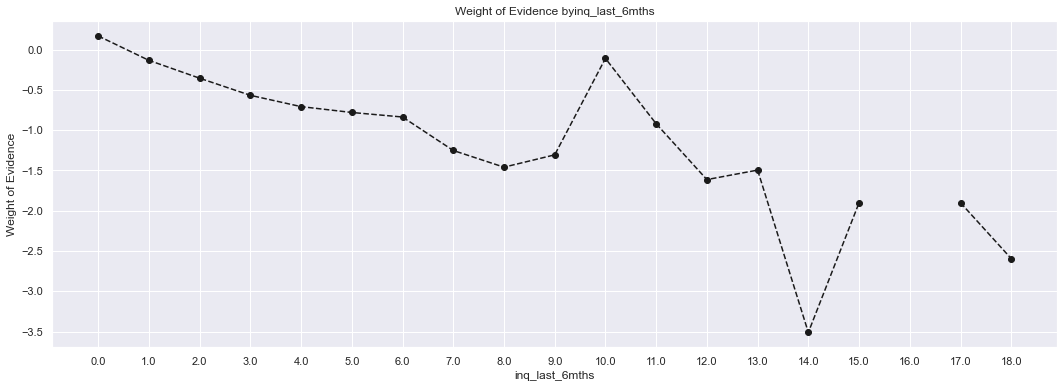

In [101]:
plot_by_woe(df_temp)

In [102]:
df_inputs_prepr['inq_last_6mths:0'] = np.where((df_inputs_prepr['inq_last_6mths'] == 0), 1, 0)
df_inputs_prepr['inq_last_6mths:1-2'] = np.where((df_inputs_prepr['inq_last_6mths'] >= 1) & (df_inputs_prepr['inq_last_6mths'] <= 2), 1, 0)
df_inputs_prepr['inq_last_6mths:3-6'] = np.where((df_inputs_prepr['inq_last_6mths'] >= 3) & (df_inputs_prepr['inq_last_6mths'] <= 6), 1, 0)
df_inputs_prepr['inq_last_6mths:>6'] = np.where((df_inputs_prepr['inq_last_6mths'] > 6), 1, 0)

<ipython-input-102-4a1a7b432047>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_inputs_prepr['inq_last_6mths:0'] = np.where((df_inputs_prepr['inq_last_6mths'] == 0), 1, 0)
<ipython-input-102-4a1a7b432047>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_inputs_prepr['inq_last_6mths:1-2'] = np.where((df_inputs_prepr['inq_last_6mths'] >= 1) & (df_inputs_prepr['inq_last_6mths'] <= 2), 1, 0)
<ipython-input-102-4a1a7b432047>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice fro

In [103]:
df_inputs_prepr['open_acc'].nunique()

90

In [104]:
df_inputs_prepr['open_acc'].head(50)

1986640    7.00000
2097124    6.00000
728646    12.00000
718214     7.00000
700110    12.00000
2572469    8.00000
1932559   14.00000
1768836   18.00000
1351671   14.00000
2612467   12.00000
1579136    9.00000
2420466   29.00000
2441348    9.00000
2804050   13.00000
336253     7.00000
866302     8.00000
125933     6.00000
1030472   20.00000
1844289   18.00000
676710    12.00000
1822362    7.00000
231967    15.00000
969683     8.00000
1409067    6.00000
2903601   11.00000
1254718   34.00000
2218808    9.00000
2923366    7.00000
1715844   10.00000
772724    11.00000
2863341   10.00000
1118321   25.00000
204845     5.00000
776249    16.00000
708686    14.00000
1931953   11.00000
1408464    8.00000
2093864   12.00000
1828551   17.00000
2766457   15.00000
496207    13.00000
98977     12.00000
894338    12.00000
1635630   11.00000
1213921   11.00000
1309425   11.00000
104289     9.00000
590867    15.00000
155122    11.00000
1260585   11.00000
Name: open_acc, dtype: float64

In [105]:
df_inputs_prepr['open_acc'].describe()

count   2340393.00000
mean         11.67373
std           5.73274
min           0.00000
25%           8.00000
50%          11.00000
75%          15.00000
max         104.00000
Name: open_acc, dtype: float64

In [106]:
df_temp = woe_ordered_continuous(df_inputs_prepr, 'open_acc', df_targets_prepr)
df_temp

C:\Users\marcu\anaconda3\lib\site-packages\pandas\core\arraylike.py:358: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


,open_acc,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,0.00000,97,0.88660,0.00004,86.00000,11.00000,0.00004,0.00004,0.15563,NaN,NaN,inf
1,1.00000,1911,0.86238,0.00082,1648.00000,263.00000,0.00081,0.00086,-0.06566,0.02422,0.22129,inf
2,2.00000,12074,0.87635,0.00516,10581.00000,1493.00000,0.00520,0.00491,0.05745,0.01397,0.12311,inf
3,3.00000,34470,0.88204,0.01473,30404.00000,4066.00000,0.01493,0.01336,0.11110,0.00570,0.05364,inf
4,4.00000,70677,0.87958,0.03020,62166.00000,8511.00000,0.03053,0.02797,0.08763,0.00246,0.02347,inf
5,5.00000,112450,0.88021,0.04805,98980.00000,13470.00000,0.04861,0.04427,0.09363,0.00063,0.00600,inf
6,6.00000,149703,0.87787,0.06396,131420.00000,18283.00000,0.06454,0.06008,0.07161,0.00234,0.02203,inf
7,7.00000,177855,0.87453,0.07599,155540.00000,22315.00000,0.07639,0.07334,0.04082,0.00334,0.03078,inf
8,8.00000,193377,0.87311,0.08263,168839.00000,24538.00000,0.08292,0.08064,0.02790,0.00142,0.01292,inf
9,9.00000,199960,0.86987,0.08544,173940.00000,26020.00000,0.08543,0.08551,-0.00097,0.00323,0.02888,inf


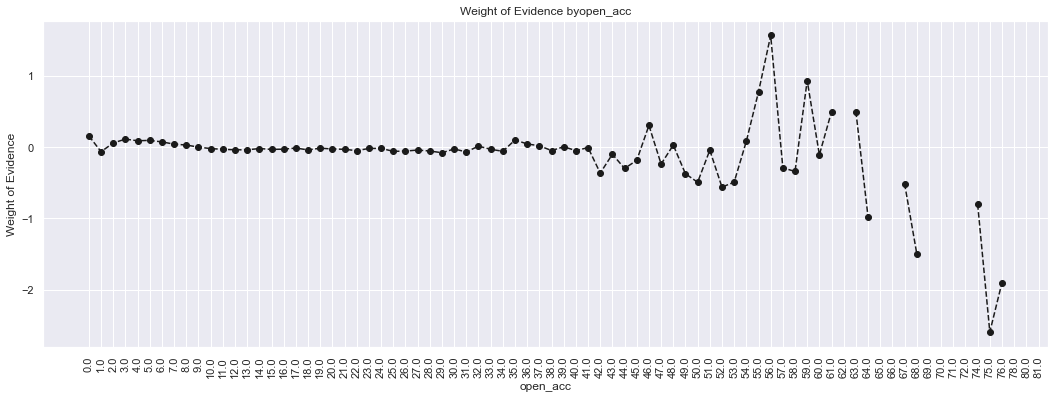

In [107]:
plot_by_woe(df_temp, 90)

In [108]:
df_inputs_prepr['open_acc:0'] = np.where((df_inputs_prepr['open_acc'] == 0),1,0)
df_inputs_prepr['open_acc:1-2'] = np.where(((df_inputs_prepr['open_acc'] >= 1) & (df_inputs_prepr['open_acc'] <= 2)),1,0)
df_inputs_prepr['open_acc:3-8'] = np.where(((df_inputs_prepr['open_acc'] >= 3) & (df_inputs_prepr['open_acc'] <= 8)),1,0)
df_inputs_prepr['open_acc:9-34'] = np.where(((df_inputs_prepr['open_acc'] >= 9) & (df_inputs_prepr['open_acc'] <= 34)),1,0)
df_inputs_prepr['open_acc:35-76'] = np.where(((df_inputs_prepr['open_acc'] >= 35) & (df_inputs_prepr['open_acc'] <= 76)),1,0)

<ipython-input-108-b67ccacc9028>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_inputs_prepr['open_acc:0'] = np.where((df_inputs_prepr['open_acc'] == 0),1,0)
<ipython-input-108-b67ccacc9028>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_inputs_prepr['open_acc:1-2'] = np.where(((df_inputs_prepr['open_acc'] >= 1) & (df_inputs_prepr['open_acc'] <= 2)),1,0)
<ipython-input-108-b67ccacc9028>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[ro

In [109]:
df_inputs_prepr['pub_rec'].unique()

array([ 0.,  1.,  2.,  3.,  4.,  7.,  6., 21.,  5.,  9.,  8., 11., 10.,
       12., 34., 13., 18., 14., 49., 17., 16., 46., 15., 22., 32., 63.,
       54., 19., 28., 20., 61., 24., 25., 23., 26., 44., 31., 86.])

In [110]:
df_temp = woe_ordered_continuous(df_inputs_prepr, 'pub_rec', df_targets_prepr)
df_temp

C:\Users\marcu\anaconda3\lib\site-packages\pandas\core\arraylike.py:358: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


,pub_rec,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,0.00000,1999406,0.87617,0.85430,1751826.00000,247580.00000,0.86038,0.81364,0.05586,NaN,NaN,inf
1,1.00000,298433,0.83876,0.12751,250315.00000,48118.00000,0.12294,0.15813,-0.25176,0.03741,0.30762,inf
2,2.00000,27850,0.79616,0.01190,22173.00000,5677.00000,0.01089,0.01866,-0.53837,0.04261,0.28661,inf
3,3.00000,8459,0.80258,0.00361,6789.00000,1670.00000,0.00333,0.00549,-0.49834,0.00642,0.04003,inf
4,4.00000,3082,0.79202,0.00132,2441.00000,641.00000,0.00120,0.00211,-0.56369,0.01056,0.06535,inf
5,5.00000,1481,0.81229,0.00063,1203.00000,278.00000,0.00059,0.00091,-0.43587,0.02027,0.12782,inf
6,6.00000,758,0.79947,0.00032,606.00000,152.00000,0.00030,0.00050,-0.51782,0.01282,0.08195,inf
7,7.00000,343,0.81633,0.00015,280.00000,63.00000,0.00014,0.00021,-0.40916,0.01685,0.10866,inf
8,8.00000,204,0.82843,0.00009,169.00000,35.00000,0.00008,0.00012,-0.32627,0.01210,0.08290,inf
9,9.00000,126,0.80952,0.00005,102.00000,24.00000,0.00005,0.00008,-0.45390,0.01891,0.12763,inf


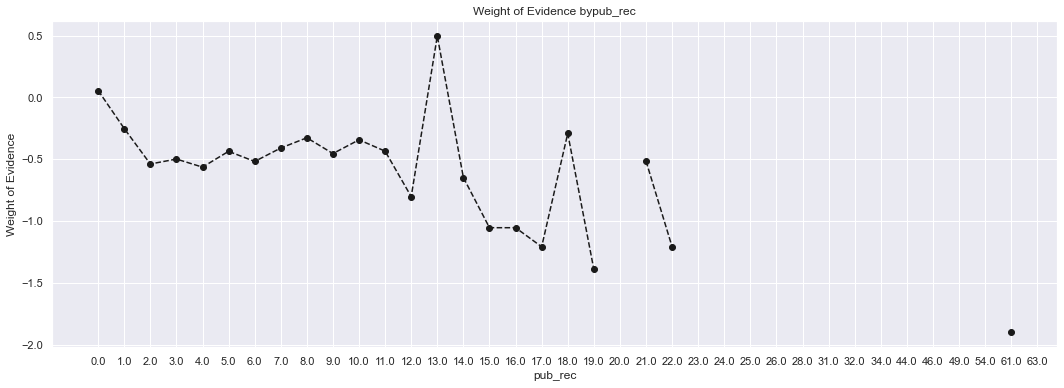

In [111]:
plot_by_woe(df_temp)

In [112]:
df_inputs_prepr['pub_rec:0'] = np.where((df_inputs_prepr['pub_rec'] == 0),1,0)
df_inputs_prepr['pub_rec:1'] = np.where((df_inputs_prepr['pub_rec'] == 1),1,0)
df_inputs_prepr['pub_rec:2-4'] = np.where(((df_inputs_prepr['pub_rec'] >= 2) & (df_inputs_prepr['pub_rec'] <= 4)),1,0)
df_inputs_prepr['pub_rec:5-11'] = np.where(((df_inputs_prepr['pub_rec'] >= 5) & (df_inputs_prepr['pub_rec'] <= 11)),1,0)
df_inputs_prepr['pub_rec:>=12'] = np.where((df_inputs_prepr['pub_rec'] >= 12),1,0)

<ipython-input-112-47e10d5bcd43>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_inputs_prepr['pub_rec:0'] = np.where((df_inputs_prepr['pub_rec'] == 0),1,0)
<ipython-input-112-47e10d5bcd43>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_inputs_prepr['pub_rec:1'] = np.where((df_inputs_prepr['pub_rec'] == 1),1,0)
<ipython-input-112-47e10d5bcd43>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See t

In [113]:
df_inputs_prepr['total_acc'].describe()

count   2340393.00000
mean         24.01679
std          12.07902
min           0.00000
25%          15.00000
50%          22.00000
75%          31.00000
max         176.00000
Name: total_acc, dtype: float64

In [114]:
df_inputs_prepr['total_acc_factor'] = pd.cut(df_inputs_prepr['total_acc'], 50)
df_temp = woe_ordered_continuous(df_inputs_prepr, 'total_acc_factor', df_targets_prepr)
df_temp

<ipython-input-114-10139de0f4de>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_inputs_prepr['total_acc_factor'] = pd.cut(df_inputs_prepr['total_acc'], 50)
C:\Users\marcu\anaconda3\lib\site-packages\pandas\core\arraylike.py:358: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


,total_acc_factor,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,"(-0.176, 3.52]",6568,0.87698,0.00281,5760.00000,808.00000,0.00283,0.00266,0.06331,NaN,NaN,inf
1,"(3.52, 7.04]",88367,0.87188,0.03776,77045.00000,11322.00000,0.03784,0.03721,0.01682,0.00510,0.04649,inf
2,"(7.04, 10.56]",148243,0.87110,0.06334,129135.00000,19108.00000,0.06342,0.06280,0.00993,0.00077,0.00689,inf
3,"(10.56, 14.08]",285954,0.86994,0.12218,248763.00000,37191.00000,0.12218,0.12222,-0.00039,0.00116,0.01032,inf
4,"(14.08, 17.6]",249766,0.87045,0.10672,217409.00000,32357.00000,0.10678,0.10634,0.00413,0.00051,0.00452,inf
5,"(17.6, 21.12]",339659,0.87111,0.14513,295879.00000,43780.00000,0.14532,0.14388,0.00995,0.00066,0.00582,inf
6,"(21.12, 24.64]",238194,0.87215,0.10178,207742.00000,30452.00000,0.10203,0.10008,0.01933,0.00105,0.00937,inf
7,"(24.64, 28.16]",273059,0.86995,0.11667,237548.00000,35511.00000,0.11667,0.11670,-0.00029,0.00220,0.01962,inf
8,"(28.16, 31.68]",166878,0.86905,0.07130,145026.00000,21852.00000,0.07123,0.07181,-0.00820,0.00090,0.00791,inf
9,"(31.68, 35.2]",173200,0.86895,0.07400,150502.00000,22698.00000,0.07392,0.07459,-0.00912,0.00010,0.00092,inf


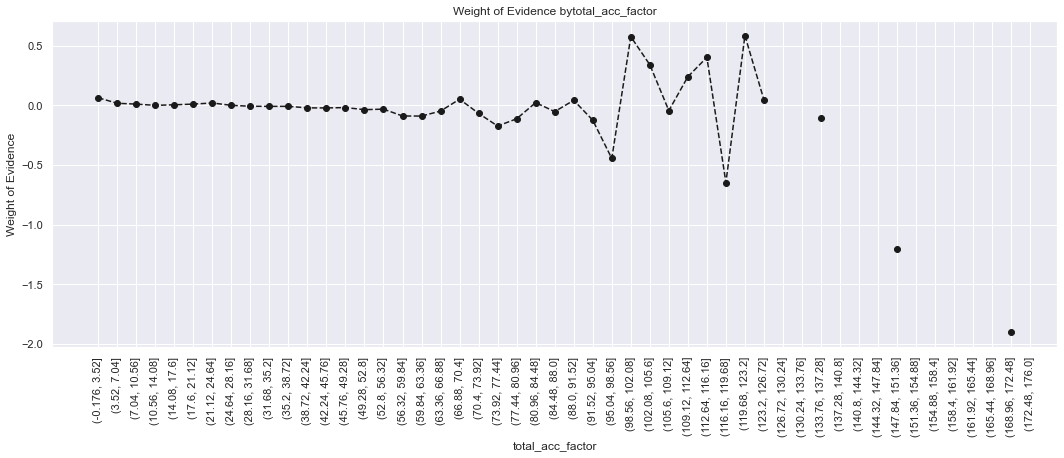

In [115]:
plot_by_woe(df_temp, 90)

In [116]:
df_inputs_prepr['total_acc:<=28'] = np.where((df_inputs_prepr['total_acc'] <= 28), 1, 0)
df_inputs_prepr['total_acc:29-53'] = np.where((df_inputs_prepr['total_acc'] >= 29) & (df_inputs_prepr['total_acc'] <= 53), 1, 0)
df_inputs_prepr['total_acc:>=54'] = np.where((df_inputs_prepr['total_acc'] >= 54), 1, 0)

<ipython-input-116-9473e96b3cdd>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_inputs_prepr['total_acc:<=28'] = np.where((df_inputs_prepr['total_acc'] <= 28), 1, 0)
<ipython-input-116-9473e96b3cdd>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_inputs_prepr['total_acc:29-53'] = np.where((df_inputs_prepr['total_acc'] >= 29) & (df_inputs_prepr['total_acc'] <= 53), 1, 0)
<ipython-input-116-9473e96b3cdd>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Tr

In [117]:
df_inputs_prepr['acc_now_delinq'].unique()

array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7., 14.])

In [118]:
df_temp = woe_ordered_continuous(df_inputs_prepr, 'acc_now_delinq', df_targets_prepr)
df_temp

,acc_now_delinq,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,0.00000,2333269,0.87015,0.99696,2030290.00000,302979.00000,0.99714,0.99570,0.00145,NaN,NaN,inf
1,1.00000,6730,0.81709,0.00288,5499.00000,1231.00000,0.00270,0.00405,-0.40408,0.05306,0.40553,inf
2,2.00000,344,0.81686,0.00015,281.00000,63.00000,0.00014,0.00021,-0.40560,0.00023,0.00152,inf
3,3.00000,38,0.71053,0.00002,27.00000,11.00000,0.00001,0.00004,-1.00288,0.10633,0.59728,inf
4,4.00000,5,0.60000,0.00000,3.00000,2.00000,0.00000,0.00001,-1.49535,0.11053,0.49248,inf
5,5.00000,3,0.66667,0.00000,2.00000,1.00000,0.00000,0.00000,-1.20767,0.06667,0.28768,inf
6,6.00000,2,0.50000,0.00000,1.00000,1.00000,0.00000,0.00000,-1.90082,0.16667,0.69315,inf
7,7.00000,1,1.00000,0.00000,1.00000,0.00000,0.00000,0.00000,inf,0.50000,inf,inf
8,14.00000,1,1.00000,0.00000,1.00000,0.00000,0.00000,0.00000,inf,0.00000,NaN,inf


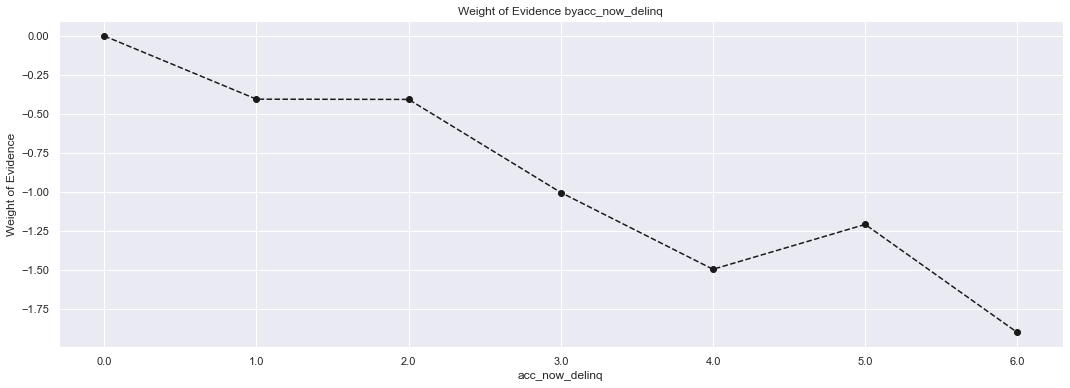

In [119]:
plot_by_woe(df_temp)

In [120]:
df_inputs_prepr['acc_now_delinq:0'] = np.where((df_inputs_prepr['acc_now_delinq'] == 0), 1, 0)
df_inputs_prepr['acc_now_delinq:>=1'] = np.where((df_inputs_prepr['acc_now_delinq'] >= 1), 1, 0)

<ipython-input-120-7c724f7eec00>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_inputs_prepr['acc_now_delinq:0'] = np.where((df_inputs_prepr['acc_now_delinq'] == 0), 1, 0)
<ipython-input-120-7c724f7eec00>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_inputs_prepr['acc_now_delinq:>=1'] = np.where((df_inputs_prepr['acc_now_delinq'] >= 1), 1, 0)


In [121]:
df_inputs_prepr['total_rev_hi_lim'].describe()

count   2340393.00000
mean      35737.96693
std       37367.88591
min           0.00000
25%       14900.00000
50%       26200.00000
75%       44900.00000
max     9999999.00000
Name: total_rev_hi_lim, dtype: float64

In [122]:
df_inputs_prepr['total_rev_hi_lim'].nunique()

31062

In [123]:
df_inputs_prepr['total_rev_hi_lim_factor'] = pd.cut(df_inputs_prepr['total_rev_hi_lim'], 2000)
df_temp = woe_ordered_continuous(df_inputs_prepr, 'total_rev_hi_lim_factor', df_targets_prepr)
df_temp

<ipython-input-123-20c0685f1897>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_inputs_prepr['total_rev_hi_lim_factor'] = pd.cut(df_inputs_prepr['total_rev_hi_lim'], 2000)
C:\Users\marcu\anaconda3\lib\site-packages\pandas\core\arraylike.py:358: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


,total_rev_hi_lim_factor,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,"(-9999.999, 5000.0]",81362,0.83709,0.03476,68107.00000,13255.00000,0.03345,0.04356,-0.26411,NaN,NaN,inf
1,"(5000.0, 9999.999]",223202,0.84088,0.09537,187686.00000,35516.00000,0.09218,0.11672,-0.23603,0.00379,0.02808,inf
2,"(9999.999, 14999.998]",281738,0.84512,0.12038,238103.00000,43635.00000,0.11694,0.14340,-0.20398,0.00424,0.03206,inf
3,"(14999.998, 19999.998]",278736,0.84952,0.11910,236793.00000,41943.00000,0.11630,0.13784,-0.16994,0.00440,0.03403,inf
4,"(19999.998, 24999.997]",246721,0.85677,0.10542,211383.00000,35338.00000,0.10382,0.11613,-0.11211,0.00725,0.05784,inf
5,"(24999.997, 29999.997]",209722,0.86467,0.08961,181341.00000,28381.00000,0.08906,0.09327,-0.04616,0.00790,0.06595,inf
6,"(29999.997, 34999.996]",173150,0.87240,0.07398,151056.00000,22094.00000,0.07419,0.07261,0.02153,0.00773,0.06769,inf
7,"(34999.996, 39999.996]",143582,0.87835,0.06135,126115.00000,17467.00000,0.06194,0.05740,0.07606,0.00595,0.05454,inf
8,"(39999.996, 44999.996]",117364,0.88606,0.05015,103992.00000,13372.00000,0.05107,0.04395,0.15033,0.00772,0.07427,inf
9,"(44999.996, 49999.995]",96720,0.88938,0.04133,86021.00000,10699.00000,0.04225,0.03516,0.18362,0.00332,0.03329,inf


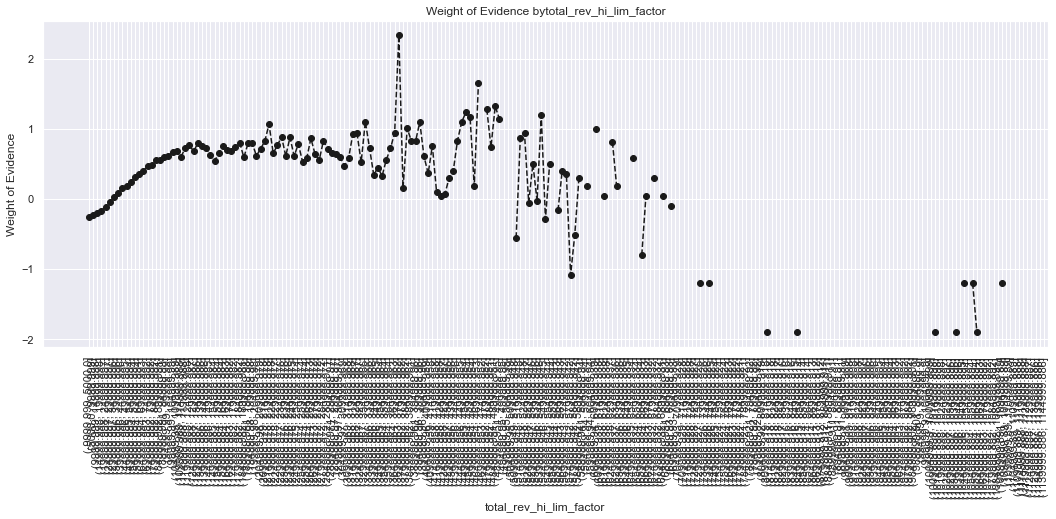

In [124]:
plot_by_woe(df_temp, 90)

In [125]:
df_inputs_prepr['total_rev_hi_lim:<=5K'] = np.where((df_inputs_prepr['total_rev_hi_lim'] <= 5000), 1, 0)
df_inputs_prepr['total_rev_hi_lim:5K-10K'] = np.where((df_inputs_prepr['total_rev_hi_lim'] > 5000) & (df_inputs_prepr['total_rev_hi_lim'] <= 10000), 1, 0)
df_inputs_prepr['total_rev_hi_lim:10K-20K'] = np.where((df_inputs_prepr['total_rev_hi_lim'] > 10000) & (df_inputs_prepr['total_rev_hi_lim'] <= 20000), 1, 0)
df_inputs_prepr['total_rev_hi_lim:20K-30K'] = np.where((df_inputs_prepr['total_rev_hi_lim'] > 20000) & (df_inputs_prepr['total_rev_hi_lim'] <= 30000), 1, 0)
df_inputs_prepr['total_rev_hi_lim:30K-40K'] = np.where((df_inputs_prepr['total_rev_hi_lim'] > 30000) & (df_inputs_prepr['total_rev_hi_lim'] <= 40000), 1, 0)
df_inputs_prepr['total_rev_hi_lim:40K-55K'] = np.where((df_inputs_prepr['total_rev_hi_lim'] > 40000) & (df_inputs_prepr['total_rev_hi_lim'] <= 55000), 1, 0)
df_inputs_prepr['total_rev_hi_lim:55K-95K'] = np.where((df_inputs_prepr['total_rev_hi_lim'] > 55000) & (df_inputs_prepr['total_rev_hi_lim'] <= 95000), 1, 0)
df_inputs_prepr['total_rev_hi_lim:>95K'] = np.where((df_inputs_prepr['total_rev_hi_lim'] > 95000), 1, 0)

<ipython-input-125-f6d04ee06be5>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_inputs_prepr['total_rev_hi_lim:<=5K'] = np.where((df_inputs_prepr['total_rev_hi_lim'] <= 5000), 1, 0)
<ipython-input-125-f6d04ee06be5>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_inputs_prepr['total_rev_hi_lim:5K-10K'] = np.where((df_inputs_prepr['total_rev_hi_lim'] > 5000) & (df_inputs_prepr['total_rev_hi_lim'] <= 10000), 1, 0)
<ipython-input-125-f6d04ee06be5>:3: SettingWithCopyWarning: 
A value is trying to be set

In [126]:
df_inputs_prepr['installment'].head()

1986640   192.56000
2097124   306.04000
728646    644.38000
718214    263.28000
700110    279.30000
Name: installment, dtype: float64

In [127]:
df_inputs_prepr['installment'].describe()

count   2340393.00000
mean        452.34656
std         272.97313
min           4.93000
25%         253.41000
50%         382.30000
75%         603.98000
max        1717.63000
Name: installment, dtype: float64

In [128]:
df_inputs_prepr['installment_factor'] = pd.cut(df_inputs_prepr['installment'],50)
df_temp = woe_ordered_continuous(df_inputs_prepr, 'installment_factor', df_targets_prepr)
df_temp

<ipython-input-128-218cbe517e52>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_inputs_prepr['installment_factor'] = pd.cut(df_inputs_prepr['installment'],50)


,installment_factor,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,"(3.217, 39.184]",11334,0.91909,0.00484,10417.00000,917.00000,0.00512,0.00301,0.52927,NaN,NaN,0.02629
1,"(39.184, 73.438]",37719,0.90959,0.01612,34309.00000,3410.00000,0.01685,0.01121,0.40788,0.00950,0.12139,0.02629
2,"(73.438, 107.692]",62308,0.90435,0.02662,56348.00000,5960.00000,0.02767,0.01959,0.34566,0.00525,0.06222,0.02629
3,"(107.692, 141.946]",72169,0.89998,0.03084,64951.00000,7218.00000,0.03190,0.02372,0.29624,0.00436,0.04942,0.02629
4,"(141.946, 176.2]",120919,0.89329,0.05167,108016.00000,12903.00000,0.05305,0.04240,0.22400,0.00669,0.07224,0.02629
5,"(176.2, 210.454]",120250,0.89264,0.05138,107340.00000,12910.00000,0.05272,0.04243,0.21718,0.00065,0.00682,0.02629
6,"(210.454, 244.708]",121324,0.88737,0.05184,107659.00000,13665.00000,0.05287,0.04491,0.16331,0.00527,0.05387,0.02629
7,"(244.708, 278.962]",154235,0.87055,0.06590,134269.00000,19966.00000,0.06594,0.06562,0.00500,0.01682,0.15832,0.02629
8,"(278.962, 313.216]",146879,0.87313,0.06276,128245.00000,18634.00000,0.06299,0.06124,0.02814,0.00259,0.02314,0.02629
9,"(313.216, 347.47]",182917,0.86685,0.07816,158562.00000,24355.00000,0.07788,0.08004,-0.02741,0.00628,0.05555,0.02629


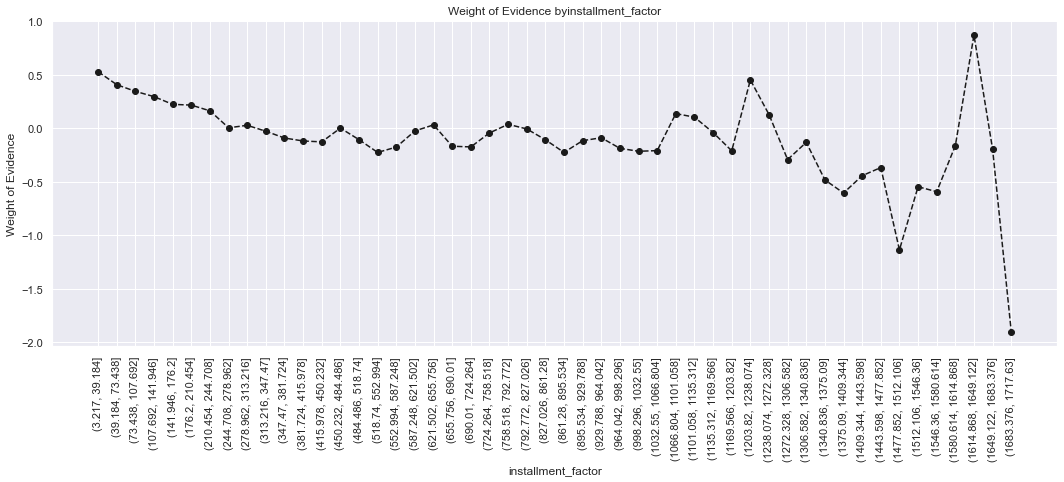

In [129]:
plot_by_woe(df_temp, 90)

In [130]:
df_inputs_prepr['installment:<=244'] = np.where((df_inputs_prepr['installment'] <= 244),1,0)
df_inputs_prepr['installment:244-793'] = np.where(((df_inputs_prepr['installment'] > 244) & (df_inputs_prepr['installment'] <= 793)),1,0)
df_inputs_prepr['installment:>793'] = np.where((df_inputs_prepr['installment'] > 793),1,0)

<ipython-input-130-9d4e8051d558>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_inputs_prepr['installment:<=244'] = np.where((df_inputs_prepr['installment'] <= 244),1,0)
<ipython-input-130-9d4e8051d558>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_inputs_prepr['installment:244-793'] = np.where(((df_inputs_prepr['installment'] > 244) & (df_inputs_prepr['installment'] <= 793)),1,0)
<ipython-input-130-9d4e8051d558>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a 

In [131]:
df_inputs_prepr['annual_inc'].describe()

count    2340393.00000
mean       79868.18416
std        92693.23817
min            0.00000
25%        47000.00000
50%        66000.00000
75%        95000.00000
max     61000000.00000
Name: annual_inc, dtype: float64

In [132]:
df_inputs_prepr['annual_inc'].head(100)

1986640    30000.00000
2097124    40000.00000
728646    160000.00000
718214     60000.00000
700110     35000.00000
2572469    35000.00000
1932559   137000.00000
1768836   135000.00000
1351671    29000.00000
2612467    86400.00000
1579136    82000.00000
2420466    45000.00000
2441348   140000.00000
2804050    42000.00000
336253    110000.00000
866302     90000.00000
125933     36000.00000
1030472    73000.00000
1844289    75000.00000
676710     51000.00000
1822362    30000.00000
231967     37000.00000
969683     90000.00000
1409067    34560.00000
2903601    83000.00000
1254718    75000.00000
2218808    62000.00000
2923366    32000.00000
1715844   100000.00000
772724     56000.00000
2863341   128000.00000
1118321   260000.00000
204845     41600.00000
776249     71402.00000
708686    138800.00000
1931953    65000.00000
1408464    60000.00000
2093864    60000.00000
1828551   350000.00000
2766457   120000.00000
496207    115000.00000
98977      54000.00000
894338     40000.00000
1635630    

In [133]:
df_inputs_prepr['annual_inc_temp'] = df_inputs_prepr['annual_inc'][df_inputs_prepr['annual_inc'] < 140000]

<ipython-input-133-15986776b089>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_inputs_prepr['annual_inc_temp'] = df_inputs_prepr['annual_inc'][df_inputs_prepr['annual_inc'] < 140000]


In [134]:
df_inputs_prepr['annual_inc_factor'] = pd.cut(df_inputs_prepr['annual_inc_temp'], 50)
df_temp = woe_ordered_continuous(df_inputs_prepr, 'annual_inc_factor', df_targets_prepr)
df_temp

<ipython-input-134-e18b95216b29>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_inputs_prepr['annual_inc_factor'] = pd.cut(df_inputs_prepr['annual_inc_temp'], 50)


,annual_inc_factor,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,"(-139.999, 2799.98]",3014,0.91407,0.00142,2755.00000,259.00000,0.00150,0.00091,0.49880,NaN,NaN,0.02527
1,"(2799.98, 5599.96]",668,0.91168,0.00031,609.00000,59.00000,0.00033,0.00021,0.46873,0.00239,0.03006,0.02527
2,"(5599.96, 8399.94]",1059,0.88574,0.00050,938.00000,121.00000,0.00051,0.00042,0.18241,0.02594,0.28632,0.02527
3,"(8399.94, 11199.92]",4105,0.84896,0.00193,3485.00000,620.00000,0.00189,0.00218,-0.13905,0.03678,0.32146,0.02527
4,"(11199.92, 13999.9]",5856,0.83658,0.00276,4899.00000,957.00000,0.00266,0.00336,-0.23257,0.01239,0.09352,0.02527
5,"(13999.9, 16799.88]",10301,0.83953,0.00485,8648.00000,1653.00000,0.00470,0.00581,-0.21081,0.00295,0.02175,0.02527
6,"(16799.88, 19599.86]",11531,0.83687,0.00543,9650.00000,1881.00000,0.00525,0.00661,-0.23040,0.00266,0.01958,0.02527
7,"(19599.86, 22399.84]",22164,0.83902,0.01044,18596.00000,3568.00000,0.01011,0.01253,-0.21461,0.00214,0.01579,0.02527
8,"(22399.84, 25199.82]",36329,0.84142,0.01711,30568.00000,5761.00000,0.01662,0.02023,-0.19671,0.00240,0.01790,0.02527
9,"(25199.82, 27999.8]",21467,0.83538,0.01011,17933.00000,3534.00000,0.00975,0.01241,-0.24134,0.00605,0.04463,0.02527


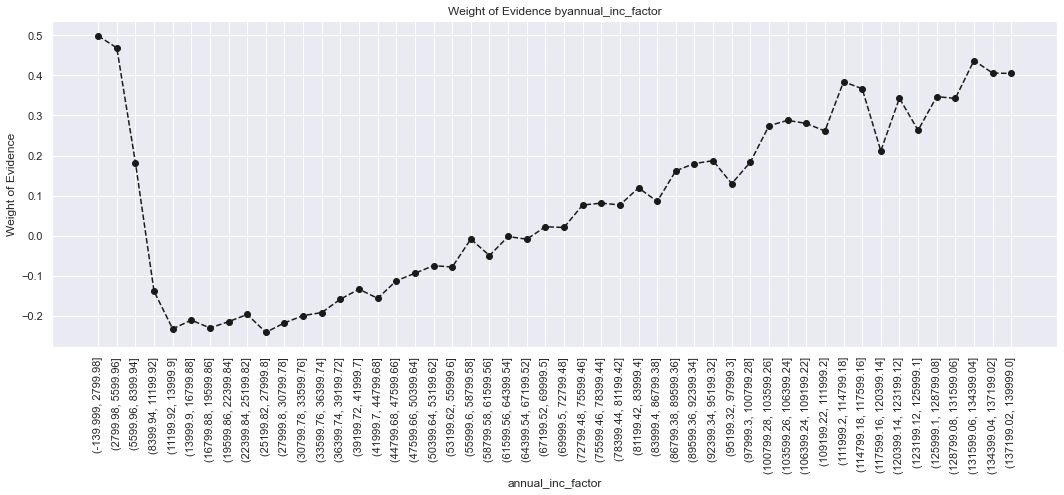

In [135]:
plot_by_woe(df_temp, 90)

In [136]:
df_inputs_prepr['annual_inc:<=14,000'] = np.where((df_inputs_prepr['annual_inc'] <= 14000),1,0)
df_inputs_prepr['annual_inc:14,001-33,600'] = np.where(((df_inputs_prepr['annual_inc'] >14000) & (df_inputs_prepr['annual_inc'] <= 33600)),1,0)
df_inputs_prepr['annual_inc:33,601-53,200'] = np.where(((df_inputs_prepr['annual_inc'] >33600) & (df_inputs_prepr['annual_inc'] <= 53200)),1,0)
df_inputs_prepr['annual_inc:53,201-70,000'] = np.where(((df_inputs_prepr['annual_inc'] >53200) & (df_inputs_prepr['annual_inc'] <= 70000)),1,0)
df_inputs_prepr['annual_inc:70,001-86,800'] = np.where(((df_inputs_prepr['annual_inc'] >70000) & (df_inputs_prepr['annual_inc'] <= 86800)),1,0)
df_inputs_prepr['annual_inc:86,801-112,000'] = np.where(((df_inputs_prepr['annual_inc'] >86800) & (df_inputs_prepr['annual_inc'] <= 112000)),1,0)
df_inputs_prepr['annual_inc:112,001-140,000'] = np.where(((df_inputs_prepr['annual_inc'] >112000) & (df_inputs_prepr['annual_inc'] <= 140000)),1,0)
df_inputs_prepr['annual_inc:>140,000'] = np.where((df_inputs_prepr['annual_inc'] > 140000),1,0)

<ipython-input-136-a4e99c197b5f>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_inputs_prepr['annual_inc:<=14,000'] = np.where((df_inputs_prepr['annual_inc'] <= 14000),1,0)
<ipython-input-136-a4e99c197b5f>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_inputs_prepr['annual_inc:14,001-33,600'] = np.where(((df_inputs_prepr['annual_inc'] >14000) & (df_inputs_prepr['annual_inc'] <= 33600)),1,0)
<ipython-input-136-a4e99c197b5f>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slic

In [137]:
df_inputs_prepr['mths_since_last_delinq'].describe()

count   1110937.00000
mean         34.94975
std          21.90298
min           0.00000
25%          17.00000
50%          32.00000
75%          51.00000
max         226.00000
Name: mths_since_last_delinq, dtype: float64

In [138]:
df_inputs_prepr['mths_since_last_delinq'].isnull().sum()

1229456

In [139]:
df_inputs_prepr['mths_since_last_delinq'].head(100)

1986640         NaN
2097124     5.00000
728646          NaN
718214          NaN
700110     43.00000
2572469    13.00000
1932559         NaN
1768836     6.00000
1351671         NaN
2612467    29.00000
1579136         NaN
2420466     6.00000
2441348    64.00000
2804050    18.00000
336253          NaN
866302          NaN
125933          NaN
1030472         NaN
1844289         NaN
676710     14.00000
1822362    19.00000
231967          NaN
969683      7.00000
1409067         NaN
2903601         NaN
1254718    15.00000
2218808    21.00000
2923366         NaN
1715844         NaN
772724     47.00000
2863341         NaN
1118321         NaN
204845          NaN
776249      9.00000
708686      4.00000
1931953    10.00000
1408464         NaN
2093864         NaN
1828551    51.00000
2766457         NaN
496207          NaN
98977      74.00000
894338          NaN
1635630         NaN
1213921    24.00000
1309425    79.00000
104289          NaN
590867          NaN
155122          NaN
1260585         NaN


In [140]:
df_inputs_prepr_temp = df_inputs_prepr[pd.notnull(df_inputs_prepr['mths_since_last_delinq'])]
df_inputs_prepr_temp['mths_since_last_delinq_factor'] = pd.cut(df_inputs_prepr_temp['mths_since_last_delinq'], 50)

<ipython-input-140-be1544300e73>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_inputs_prepr_temp['mths_since_last_delinq_factor'] = pd.cut(df_inputs_prepr_temp['mths_since_last_delinq'], 50)


In [141]:
df_temp = woe_ordered_continuous(df_inputs_prepr_temp, 'mths_since_last_delinq_factor', df_targets_prepr[df_inputs_prepr_temp.index])
df_temp

C:\Users\marcu\anaconda3\lib\site-packages\pandas\core\arraylike.py:358: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


,mths_since_last_delinq_factor,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,"(-0.226, 4.52]",45026,0.84593,0.04053,38089.00000,6937.00000,0.03980,0.04506,-0.12417,NaN,NaN,inf
1,"(4.52, 9.04]",94967,0.85144,0.08548,80859.00000,14108.00000,0.08449,0.09164,-0.08126,0.00551,0.04291,inf
2,"(9.04, 13.56]",79037,0.85546,0.07114,67613.00000,11424.00000,0.07065,0.07421,-0.04914,0.00402,0.03212,inf
3,"(13.56, 18.08]",95858,0.85585,0.08629,82040.00000,13818.00000,0.08573,0.08976,-0.04599,0.00039,0.00315,inf
4,"(18.08, 22.6]",75271,0.86259,0.06775,64928.00000,10343.00000,0.06785,0.06719,0.00975,0.00674,0.05573,inf
5,"(22.6, 27.12]",91470,0.86269,0.08234,78910.00000,12560.00000,0.08246,0.08159,0.01057,0.00010,0.00082,inf
6,"(27.12, 31.64]",69054,0.85954,0.06216,59355.00000,9699.00000,0.06202,0.06300,-0.01571,0.00314,0.02628,inf
7,"(31.64, 36.16]",81150,0.86468,0.07305,70169.00000,10981.00000,0.07332,0.07133,0.02752,0.00514,0.04323,inf
8,"(36.16, 40.68]",61230,0.86366,0.05512,52882.00000,8348.00000,0.05526,0.05423,0.01882,0.00102,0.00870,inf
9,"(40.68, 45.2]",73954,0.86863,0.06657,64239.00000,9715.00000,0.06713,0.06311,0.06172,0.00497,0.04290,inf


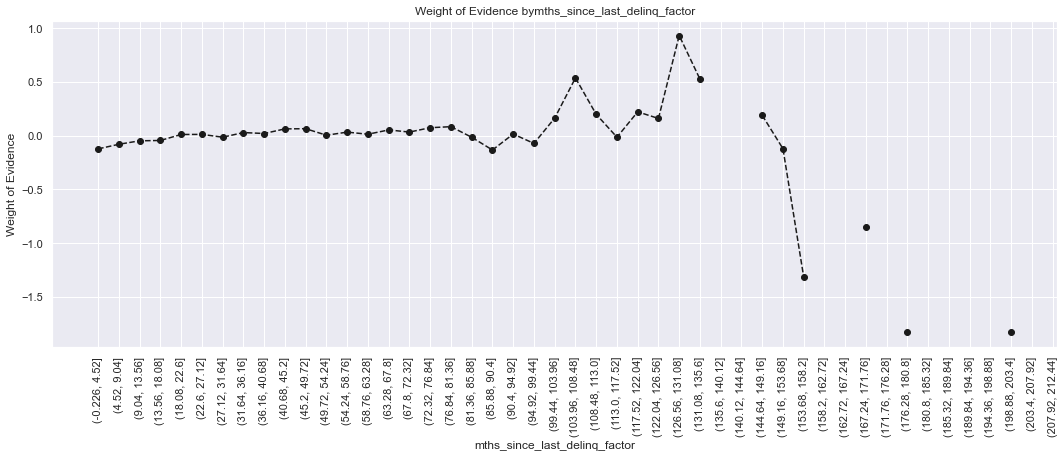

In [142]:
plot_by_woe(df_temp, 90)

In [143]:
df_inputs_prepr['mths_since_last_delinq:Missing'] = np.where((df_inputs_prepr['mths_since_last_delinq'].isnull()), 1, 0)
df_inputs_prepr['mths_since_last_delinq:<=18'] = np.where((df_inputs_prepr['mths_since_last_delinq'] <= 18),1,0)
df_inputs_prepr['mths_since_last_delinq:19-50'] = np.where(((df_inputs_prepr['mths_since_last_delinq'] > 18) & (df_inputs_prepr['mths_since_last_delinq'] <= 50)),1,0)
df_inputs_prepr['mths_since_last_delinq:51-77'] = np.where(((df_inputs_prepr['mths_since_last_delinq'] > 50) & (df_inputs_prepr['mths_since_last_delinq'] <= 77)),1,0)
df_inputs_prepr['mths_since_last_delinq:>77'] = np.where((df_inputs_prepr['mths_since_last_delinq'] > 77),1,0)

<ipython-input-143-536f0fd7ba5f>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_inputs_prepr['mths_since_last_delinq:Missing'] = np.where((df_inputs_prepr['mths_since_last_delinq'].isnull()), 1, 0)
<ipython-input-143-536f0fd7ba5f>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_inputs_prepr['mths_since_last_delinq:<=18'] = np.where((df_inputs_prepr['mths_since_last_delinq'] <= 18),1,0)
<ipython-input-143-536f0fd7ba5f>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from

In [144]:
df_inputs_prepr['dti'].describe()

count   2337885.00000
mean         19.29191
std          15.80631
min          -1.00000
25%          12.07000
50%          18.09000
75%          24.88000
max         999.00000
Name: dti, dtype: float64

In [145]:
df_inputs_prepr['dti'].head(50)

1986640    6.20000
2097124   12.39000
728646    14.85000
718214    14.46000
700110    16.60000
2572469   24.18000
1932559    8.20000
1768836   20.21000
1351671   37.54000
2612467   12.40000
1579136    6.26000
2420466   32.97000
2441348   15.31000
2804050   32.03000
336253    10.39000
866302    11.87000
125933    17.03000
1030472   31.97000
1844289   22.85000
676710    25.88000
1822362    9.36000
231967    25.40000
969683    37.79000
1409067   29.76000
2903601    9.60000
1254718   18.29000
2218808   20.63000
2923366   11.63000
1715844   15.40000
772724    14.21000
2863341    9.61000
1118321   19.41000
204845    15.06000
776249    30.47000
708686    17.77000
1931953   20.92000
1408464   26.34000
2093864   29.78000
1828551   12.91000
2766457   22.41000
496207    41.15000
98977     11.18000
894338    14.49000
1635630   26.64000
1213921   21.54000
1309425   17.67000
104289     7.07000
590867    15.90000
155122    24.53000
1260585   12.56000
Name: dti, dtype: float64

In [146]:
df_inputs_prepr_temp = df_inputs_prepr.loc[df_inputs_prepr['dti'] <= 35, :]

In [147]:
df_inputs_prepr['mths_since_last_delinq'].isnull().sum()

1229456

In [148]:
df_inputs_prepr['dti'].isnull().sum()

2508

In [149]:
a = df_inputs_prepr[pd.notnull(df_inputs_prepr['dti'])]

In [150]:
df_inputs_prepr_temp = a.loc[df_inputs_prepr['dti'] <= 35, :]
df_inputs_prepr_temp['dti_factor'] = pd.cut(df_inputs_prepr_temp['dti'], 50)
df_temp = woe_ordered_continuous(df_inputs_prepr_temp, 'dti_factor', df_targets_prepr[df_inputs_prepr_temp.index])
df_temp

<ipython-input-150-059e9ef58d5d>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_inputs_prepr_temp['dti_factor'] = pd.cut(df_inputs_prepr_temp['dti'], 50)


,dti_factor,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,"(-1.036, -0.28]",2,1.00000,0.00000,2.00000,0.00000,0.00000,0.00000,inf,NaN,NaN,inf
1,"(-0.28, 0.44]",4459,0.86768,0.00200,3869.00000,590.00000,0.00199,0.00204,-0.02215,0.13232,inf,inf
2,"(0.44, 1.16]",9511,0.87688,0.00427,8340.00000,1171.00000,0.00430,0.00405,0.06042,0.00920,0.08258,inf
3,"(1.16, 1.88]",12009,0.88300,0.00539,10604.00000,1405.00000,0.00547,0.00485,0.11841,0.00613,0.05799,inf
4,"(1.88, 2.6]",14741,0.88549,0.00661,13053.00000,1688.00000,0.00673,0.00583,0.14269,0.00249,0.02428,inf
5,"(2.6, 3.32]",18711,0.89023,0.00839,16657.00000,2054.00000,0.00858,0.00710,0.19026,0.00474,0.04757,inf
6,"(3.32, 4.04]",21918,0.89201,0.00983,19551.00000,2367.00000,0.01008,0.00818,0.20862,0.00178,0.01836,inf
7,"(4.04, 4.76]",25340,0.89357,0.01137,22643.00000,2697.00000,0.01167,0.00932,0.22493,0.00156,0.01631,inf
8,"(4.76, 5.48]",29213,0.88991,0.01310,25997.00000,3216.00000,0.01340,0.01111,0.18706,0.00366,0.03787,inf
9,"(5.48, 6.2]",33403,0.89073,0.01498,29753.00000,3650.00000,0.01533,0.01261,0.19542,0.00082,0.00836,inf


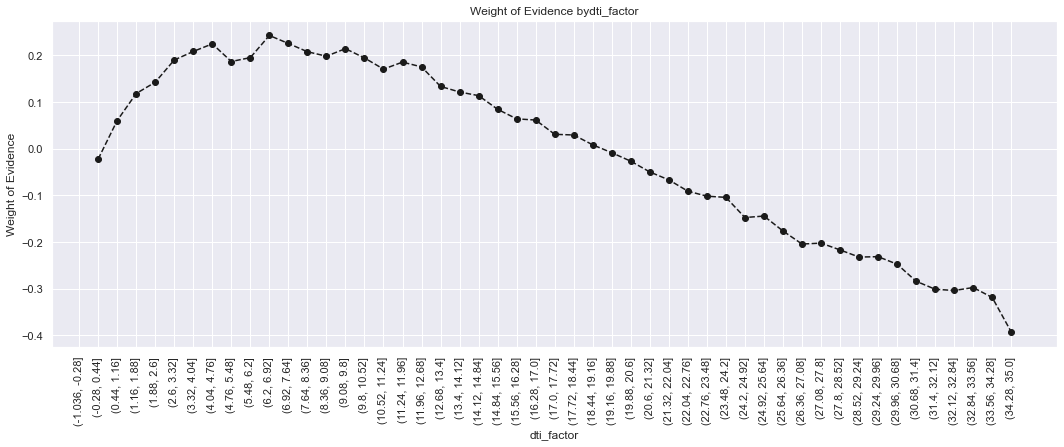

In [151]:
plot_by_woe(df_temp, 90)

In [152]:
df_inputs_prepr['dti:<=1.88'] = np.where((df_inputs_prepr['dti'] <= 1.88),1,0)
df_inputs_prepr['dti:1.88-4.76'] = np.where(((df_inputs_prepr['dti'] > 1.88) & (df_inputs_prepr['dti'] <= 4.76)),1,0)
df_inputs_prepr['dti:4.76-10.52'] = np.where(((df_inputs_prepr['dti'] > 4.76) & (df_inputs_prepr['dti'] <= 10.52)),1,0)
df_inputs_prepr['dti:10.52-14.84'] = np.where(((df_inputs_prepr['dti'] > 10.52) & (df_inputs_prepr['dti'] <= 14.84)),1,0)
df_inputs_prepr['dti:14.84-19.16'] = np.where(((df_inputs_prepr['dti'] > 14.84) & (df_inputs_prepr['dti'] <= 19.16)),1,0)
df_inputs_prepr['dti:19.16-22.76'] = np.where(((df_inputs_prepr['dti'] > 19.16) & (df_inputs_prepr['dti'] <= 22.76)),1,0)
df_inputs_prepr['dti:22.76-26.36'] = np.where(((df_inputs_prepr['dti'] > 22.76) & (df_inputs_prepr['dti'] <= 26.36)),1,0)
df_inputs_prepr['dti:26.36-30.68'] = np.where(((df_inputs_prepr['dti'] > 26.36) & (df_inputs_prepr['dti'] <= 30.68)),1,0)
df_inputs_prepr['dti:30.68-35'] = np.where(((df_inputs_prepr['dti'] > 30.68) & (df_inputs_prepr['dti'] <= 35)),1,0)
df_inputs_prepr['dti:>35'] = np.where((df_inputs_prepr['dti'] > 35),1,0)
df_inputs_prepr['dti:missing'] = np.where((df_inputs_prepr['dti'].isnull()),1,0)

In [153]:
df_inputs_prepr['mths_since_last_record'].head(100)

1986640         NaN
2097124         NaN
728646          NaN
718214          NaN
700110          NaN
2572469         NaN
1932559         NaN
1768836         NaN
1351671         NaN
2612467   118.00000
1579136         NaN
2420466         NaN
2441348         NaN
2804050         NaN
336253          NaN
866302          NaN
125933          NaN
1030472   102.00000
1844289   117.00000
676710          NaN
1822362         NaN
231967          NaN
969683          NaN
1409067         NaN
2903601    97.00000
1254718         NaN
2218808         NaN
2923366         NaN
1715844         NaN
772724          NaN
2863341    75.00000
1118321         NaN
204845          NaN
776249          NaN
708686          NaN
1931953         NaN
1408464         NaN
2093864    75.00000
1828551         NaN
2766457         NaN
496207          NaN
98977           NaN
894338    101.00000
1635630         NaN
1213921         NaN
1309425         NaN
104289          NaN
590867          NaN
155122          NaN
1260585    74.00000


In [154]:
df_inputs_prepr['mths_since_last_record'].isnull().sum()

1998387

In [155]:
df_inputs_prepr_temp = df_inputs_prepr[pd.notnull(df_inputs_prepr['mths_since_last_record'])]
df_inputs_prepr_temp['mths_since_last_record_factor'] = pd.cut(df_inputs_prepr_temp['mths_since_last_record'], 50)
df_temp = woe_ordered_continuous(df_inputs_prepr_temp, 'mths_since_last_record_factor', df_targets_prepr[df_inputs_prepr_temp.index])
df_temp

<ipython-input-155-8da89b1d64fd>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_inputs_prepr_temp['mths_since_last_record_factor'] = pd.cut(df_inputs_prepr_temp['mths_since_last_record'], 50)


,mths_since_last_record_factor,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,"(-0.127, 2.54]",1313,0.75628,0.00384,993.00000,320.00000,0.00348,0.00562,-0.47772,NaN,NaN,0.01405
1,"(2.54, 5.08]",918,0.77778,0.00268,714.00000,204.00000,0.00250,0.00358,-0.35737,0.02149,0.12035,0.01405
2,"(5.08, 7.62]",849,0.79859,0.00248,678.00000,171.00000,0.00238,0.00300,-0.23265,0.02081,0.12472,0.01405
3,"(7.62, 10.16]",1575,0.80127,0.00461,1262.00000,313.00000,0.00443,0.00549,-0.21588,0.00268,0.01677,0.01405
4,"(10.16, 12.7]",1211,0.79686,0.00354,965.00000,246.00000,0.00339,0.00432,-0.24334,0.00441,0.02745,0.01405
5,"(12.7, 15.24]",1893,0.82567,0.00553,1563.00000,330.00000,0.00548,0.00579,-0.05486,0.02881,0.18847,0.01405
6,"(15.24, 17.78]",1322,0.81241,0.00387,1074.00000,248.00000,0.00377,0.00435,-0.14442,0.01327,0.08955,0.01405
7,"(17.78, 20.32]",2333,0.82340,0.00682,1921.00000,412.00000,0.00674,0.00723,-0.07055,0.01100,0.07386,0.01405
8,"(20.32, 22.86]",1639,0.82672,0.00479,1355.00000,284.00000,0.00475,0.00499,-0.04755,0.00332,0.02300,0.01405
9,"(22.86, 25.4]",2881,0.81499,0.00842,2348.00000,533.00000,0.00824,0.00936,-0.12734,0.01173,0.07978,0.01405


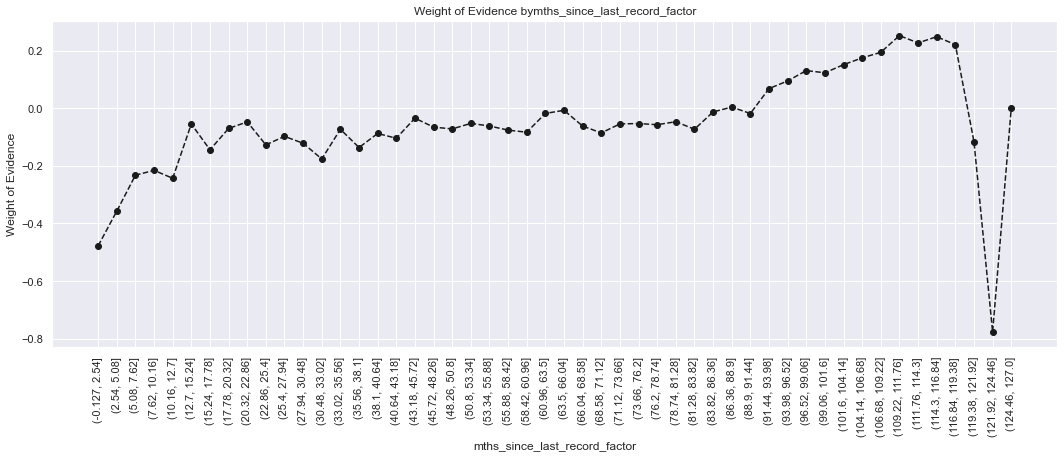

In [156]:
plot_by_woe(df_temp, 90)

In [157]:
df_inputs_prepr['mths_since_last_record:Missing'] = np.where((df_inputs_prepr['mths_since_last_record'].isnull()), 1, 0)
df_inputs_prepr['mths_since_last_record:<=15'] = np.where((df_inputs_prepr['mths_since_last_record'] <= 15),1,0)
df_inputs_prepr['mths_since_last_record:15-38'] = np.where((df_inputs_prepr['mths_since_last_record'] > 15) & (df_inputs_prepr['mths_since_last_record'] <= 38), 1, 0)
df_inputs_prepr['mths_since_last_record:38-60'] = np.where((df_inputs_prepr['mths_since_last_record'] > 38) & (df_inputs_prepr['mths_since_last_record'] <= 60), 1, 0)
df_inputs_prepr['mths_since_last_record:60-83'] = np.where((df_inputs_prepr['mths_since_last_record'] > 60) & (df_inputs_prepr['mths_since_last_record'] <= 83), 1, 0)
df_inputs_prepr['mths_since_last_record:83-99'] = np.where((df_inputs_prepr['mths_since_last_record'] >= 83) & (df_inputs_prepr['mths_since_last_record'] <= 99), 1, 0)
df_inputs_prepr['mths_since_last_record:>99'] = np.where((df_inputs_prepr['mths_since_last_record'] > 99), 1, 0)

In [158]:
loan_data_inputs_train = df_inputs_prepr

In [159]:
loan_data_inputs_train.to_csv('C:/Users/marcu/Desktop/Personal/365 Data Science/Credit risk modeling/Datasets/loan_data_inputs_train.csv')